In [1]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import functools
import statistics
import math
import os
from datetime import datetime, timedelta
import random
import scipy as sp
import warnings
import gzip
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")
pd.options.mode.chained_assignment = None
import statsmodels
from statsmodels.regression.rolling import RollingOLS
import requests
import matplotlib as mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'


***
# Motivation

American legislators, such members of Congress, have access to priviledged information regarding governmental affairs, the economic landscape, and the regulatory future of the US and they are able to directly impact and influence policy and firms. Despite this, it is incredibly common for legislators to conduct strategic open-market activities that allow them to benefit directly from policy decisions that they have influence over or inside information on. As a result, public perception of these trades, made public knowledge due to the STOCK Act of 2012, which forces members of government to disclose open-market activity, suggests that these trades contain material information on either the value of the firm or some future event. 

Contrary to popular belief, findings by Abdurankhmonov et al. (2022) suggest that positive abnormal returns resulting from trading disclosure materialize the *day of* disclosure and in the time period immediately after disclosure negative abnormal returns are more likely. While surprising, this is in line with literature, with Bellmont et al. (2022) and Hall et al. (2021) also discovering that, on average, Congress members performed only slightly better than the market, and that members of Congress had higher and more robust excess returns in the pre-STOCK Act period, before 2012. For the purposes of this project, the implication is that a viable trading strategy may in fact be found in betting against, rather than with, the trades of Congresspeople and legislators.

In this project, we will create a systematic trading strategy that incorporates various signals stemming from publicly available data sources in order to invest in a selection of different assets in order to generate excess returns that are largely uncorrelated with the market and other common market factors in the Fama-French 5 factor model.

## Strategy



## Leverage



## Risk management




## Evidence for excess returns





In [2]:

data_senate = pd.read_csv('C:/Users/dcste/OneDrive/Economics_Research/Economics_Research/trade_transactions.csv')

In [3]:
data_senate['disclosure_date'] = pd.to_datetime(data_senate['disclosure_date'])
data_senate = data_senate.set_index(data_senate['disclosure_date'])
data_senate = data_senate.sort_index()
data_senate = data_senate.dropna(subset=['ticker'])
data_senate

,transaction_date,disclosure_date,owner,ticker,asset_description,asset_type,type,amount,comment,senator,ptr_link,party,state,industry,sector,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
disclosure_date,,,,,,,,,,,,,,,,,,,,
2014-01-31,1/24/2014,2014-01-31,Spouse,GE,General Electric Company (NYSE),NaN,Sale (Partial),"$1,001 - $15,000",--,Susan M. Collins,https://efdsearch.senate.gov/search/view/ptr/5...,Republican,ME,Consumer Electronics/Appliances,Energy,NaN,NaN,NaN,NaN,NaN
2014-01-31,1/24/2014,2014-01-31,Spouse,CRM,"Salesforce.com, Inc (NYSE)",NaN,Purchase,"$1,001 - $15,000",--,Susan M. Collins,https://efdsearch.senate.gov/search/view/ptr/5...,Republican,ME,Computer Software: Prepackaged Software,Technology,NaN,NaN,NaN,NaN,NaN
2014-01-31,1/24/2014,2014-01-31,Spouse,FB,"Facebook, Inc. (NASDAQ)",NaN,Purchase,"$1,001 - $15,000",--,Susan M. Collins,https://efdsearch.senate.gov/search/view/ptr/5...,Republican,ME,"Computer Software: Programming, Data Processing",Technology,NaN,NaN,NaN,NaN,NaN
2014-01-31,1/28/2014,2014-01-31,Spouse,EBAY,eBay Inc. (NASDAQ),NaN,Sale (Partial),"$1,001 - $15,000",--,Susan M. Collins,https://efdsearch.senate.gov/search/view/ptr/5...,Republican,ME,Business Services,Miscellaneous,NaN,NaN,NaN,NaN,NaN
2014-01-31,1/29/2014,2014-01-31,Spouse,C,"Citigroup, Inc. (NYSE)",NaN,Sale (Partial),"$1,001 - $15,000",--,Susan M. Collins,https://efdsearch.senate.gov/search/view/ptr/5...,Republican,ME,Major Banks,Finance,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-14,1/5/2023,2023-02-14,Joint,X,United States Steel Corporation Common Stock,Stock,Sale (Partial),"$1,001 - $15,000",--,Tommy Tuberville,https://efdsearch.senate.gov/search/view/ptr/9...,Republican,AL,Steel/Iron Ore,Industrials,NaN,NaN,NaN,NaN,NaN
2023-02-14,1/5/2023,2023-02-14,Joint,X,United States Steel Corporation Common Stock,Stock,Sale (Partial),"$15,001 - $50,000",--,Tommy Tuberville,https://efdsearch.senate.gov/search/view/ptr/9...,Republican,AL,Steel/Iron Ore,Industrials,NaN,NaN,NaN,NaN,NaN
2023-02-14,1/5/2023,2023-02-14,Joint,X,United States Steel Corporation Common Stock,Stock,Sale (Partial),"$50,001 - $100,000",--,Tommy Tuberville,https://efdsearch.senate.gov/search/view/ptr/9...,Republican,AL,Steel/Iron Ore,Industrials,NaN,NaN,NaN,NaN,NaN


In [4]:
data_house = pd.read_csv('C:/Users/dcste/OneDrive/Economics_Research/Economics_Research/all_transactions_house (2).csv')
data_house['disclosure_date'] = pd.to_datetime(data_house['disclosure_date'])
data_house = data_house.set_index(data_house['disclosure_date'])
data_house = data_house.sort_index()
data_house = data_house.dropna(subset=['ticker'])
data_house = data_house[data_house['ticker'] != "--"]
data_house = data_house[['disclosure_date', 'transaction_date', 'ticker', 'asset_description', 'type', 'amount', 'representative', 'party','state', 'industry' , 'sector' ]]

In [5]:
data_senate = data_senate[['disclosure_date', 'transaction_date', 'ticker', 'asset_description', 'type', 'amount', 'senator', 'party','state', 'industry' , 'sector' ]]

In [6]:
data = pd.concat([data_house, data_senate]).sort_index()
data['representative'] = data['representative'].fillna(data['senator'])
del data['senator']

In [7]:
data.index[-1]

Timestamp('2023-02-20 00:00:00')

In [8]:
prices = pd.read_csv('C:/Users/dcste/OneDrive/Economics_Research/Economics_Research/project_price_df.csv')

In [9]:
most_frequent_tickers = pd.DataFrame(data['ticker'].value_counts()).iloc[:20,:]

In [10]:
most_frequent_sector = pd.DataFrame(data['sector'].value_counts())

<AxesSubplot:title={'center':'Most Frequent Sector Traded'}>

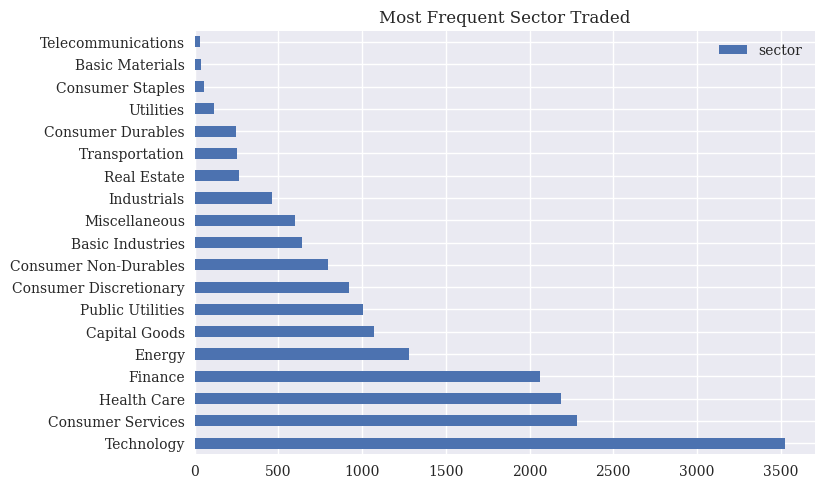

In [11]:
most_frequent_sector.plot.barh(stacked = True, title = 'Most Frequent Sector Traded')

In [12]:
most_frequent_politician = pd.DataFrame(data['representative'].value_counts()).iloc[:25,:]


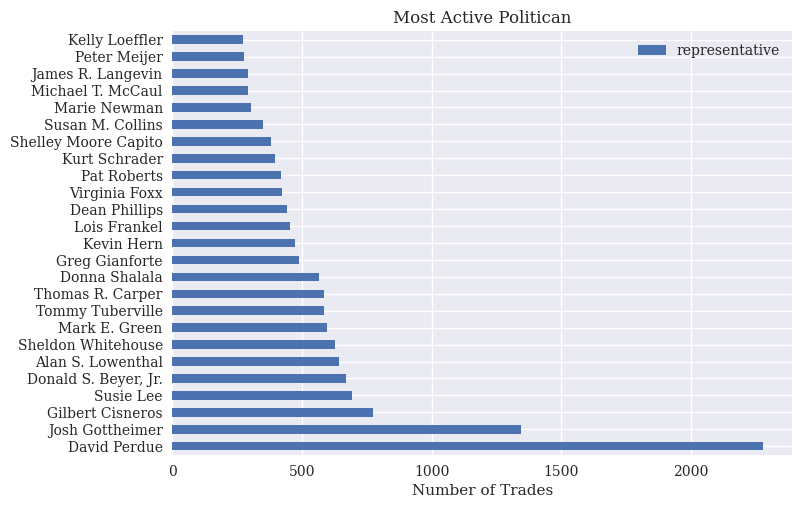

In [13]:
most_frequent_politician.plot.barh(stacked = 'True',title = 'Most Active Politican')
plt.xlabel('Number of Trades')
plt.legend()



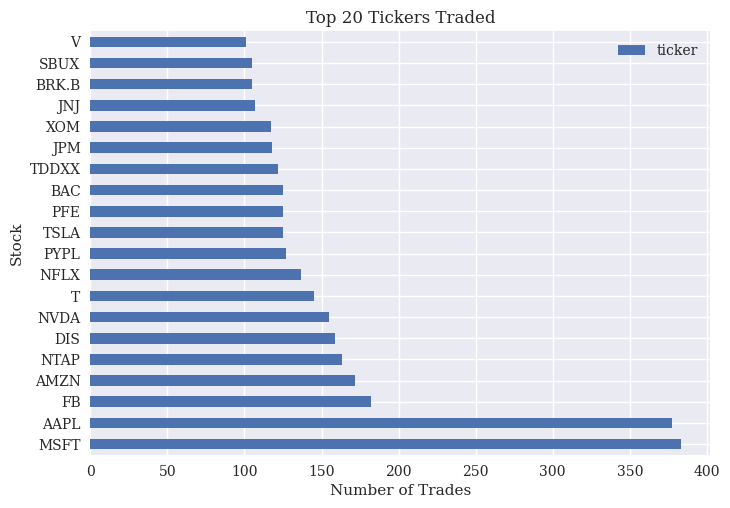

In [14]:
most_frequent_tickers.plot.barh(stacked = True, title = 'Top 20 Tickers Traded')
plt.xlabel('Number of Trades')
plt.ylabel('Stock')
plt.savefig('top_20_tickers_trade.png')


# Downloading Quandl Data

In [15]:
import quandl

apikey = 'J_fXGeVW_zC6RaDeJSQv'
quandl.ApiConfig.api_key = apikey

In [16]:
import fredapi

In [17]:
# FRED API
api_fred = 'caf2a437b55be8f56406870c1bed3521'
fred = fredapi.Fred(api_key= api_fred)

In [18]:
period_begin = '2004-01-01'
end_date = data.index[-1]


In [19]:
end_date

Timestamp('2023-02-20 00:00:00')

In [20]:
market = quandl.get_table('QUOTEMEDIA/PRICES', ticker = 'SPY',qopts = {'columns' : ['adj_close','date']}, date = {'gte':period_begin,'lte':end_date}).set_index('date').sort_index()
MARKET_RETURNS = market.resample('M').last().pct_change()
MARKET_RETURNS.columns = ['MKT_RETS']

interest_rates = quandl.get('YC/USA', start_date = period_begin,end_date = end_date)[['1-Month','3-Month','10-Year']]*(1/100)
interest_rates['term_spread'] = interest_rates['10-Year']-interest_rates['3-Month']
interest_rates = interest_rates.resample('M').last()
spy_earnings_yield = quandl.get('MULTPL/SP500_EARNINGS_YIELD_MONTH', start_date = period_begin, end_date = end_date).rename(columns={'Value':'MKT_EPS'})
consumer_sentiment = quandl.get('UMICH/SOC1',start_date = period_begin, end_date= end_date).rename(columns={'Value':'Industrial_Production'}).pct_change().fillna(0)



In [640]:
oil  = quandl.get('OPEC/ORB', start_date = period_begin, end_date=end_date).rename(columns={'Value':'OPEC_Crude_Price'})
oil = oil.resample('M').last()
oil_change = oil.pct_change()


In [1543]:
inflation = quandl.get('RATEINF/CPI_USA', start_date = '2002-01-01', end_date = end_date).rename(columns={'Value':'CPI'})
inflation_rets = inflation.pct_change()

In [1544]:
inflation['inflation_shift'] = inflation.shift(12)
inflation['YoY_Change'] = (inflation['CPI']/inflation['inflation_shift'])-1
inflation.dropna(inplace=True)


In [1545]:
inflation.loc[inflation.YoY_Change.idxmax()]

CPI                296.311000
inflation_shift    271.696000
YoY_Change           0.090598
Name: 2022-06-30 00:00:00, dtype: float64

In [779]:
inflation.loc['2005-01']

,CPI,inflation_shift
Date,,
2005-01-31,190.7,185.2


In [771]:
inflation_rets.loc[inflation_rets.idxmax()]

,CPI
Date,
2022-06-30,0.013736


(array([ 1.,  0.,  2.,  2., 13., 58., 76., 54., 18.,  4.]),
 array([-0.0191529 , -0.015864  , -0.0125751 , -0.0092862 , -0.00599731,
        -0.00270841,  0.00058049,  0.00386938,  0.00715828,  0.01044718,
         0.01373608]),
 <BarContainer object of 10 artists>)

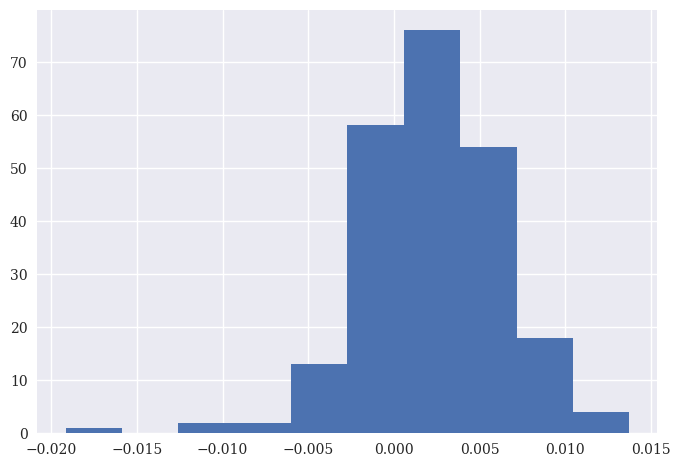

In [767]:
plt.hist(inflation_rets)

In [641]:
oil_change

,OPEC_Crude_Price
Date,
2004-01-31,NaN
2004-02-29,0.085425
2004-03-31,0.011564
2004-04-30,0.079390
2004-05-31,0.064137
...,...
2022-10-31,0.008989
2022-11-30,-0.107760
2022-12-31,-0.022134


In [21]:
# Downloading AAA and BAA corporate bond yield from FRED WEBSIDE
AAA = pd.DataFrame(fred.get_series('DAAA'), columns = ['AAA_Yield'])*(1/100)
BAA = pd.DataFrame(fred.get_series('DBAA'), columns=['BAA_Yield'])*(1/100)
corporate_bond_yields = BAA.join(AAA, how = 'inner')
corporate_bond_yields = corporate_bond_yields.fillna(corporate_bond_yields.mean())

In [22]:
corporate_bond_yields

,BAA_Yield,AAA_Yield
1986-01-02,0.1138,0.0992
1986-01-03,0.1135,0.0992
1986-01-06,0.1136,0.0994
1986-01-07,0.1129,0.0985
1986-01-08,0.1134,0.0989
...,...,...
2023-02-23,0.0574,0.0468
2023-02-24,0.0581,0.0475
2023-02-27,0.0579,0.0473
2023-02-28,0.0582,0.0476


In [23]:
market.resample('M').last().pct_change()

,adj_close
date,
2004-01-31,NaN
2004-02-29,0.013571
2004-03-31,-0.013195
2004-04-30,-0.018921
2004-05-31,0.017123
...,...
2022-10-31,0.081276
2022-11-30,0.055592
2022-12-31,-0.057577


In [25]:
corporate_bond_yields['dsspread'] = corporate_bond_yields.BAA_Yield - corporate_bond_yields.AAA_Yield

In [26]:
spy_earnings_yield

,MKT_EPS
Date,
2004-01-01,4.40
2004-02-01,4.45
2004-03-01,4.63
2004-04-01,4.71
2004-05-01,4.97
...,...
2022-11-30,4.71
2022-12-01,4.78
2023-01-01,4.74


In [27]:
mprices = market.resample('M').last()
spy_mend_eps = spy_earnings_yield.resample('M').last()
spy_mend_eps = spy_mend_eps.rolling(12).sum()

In [28]:
EPRATIO = pd.DataFrame(spy_mend_eps.values/mprices.values, columns=['EPRATIO'], index = mprices.index)

In [29]:
EPRATIO = pd.DataFrame(np.log(spy_mend_eps).values - np.log(mprices).values, columns=['EPRATIO'], index = mprices.index)

<AxesSubplot:xlabel='date'>

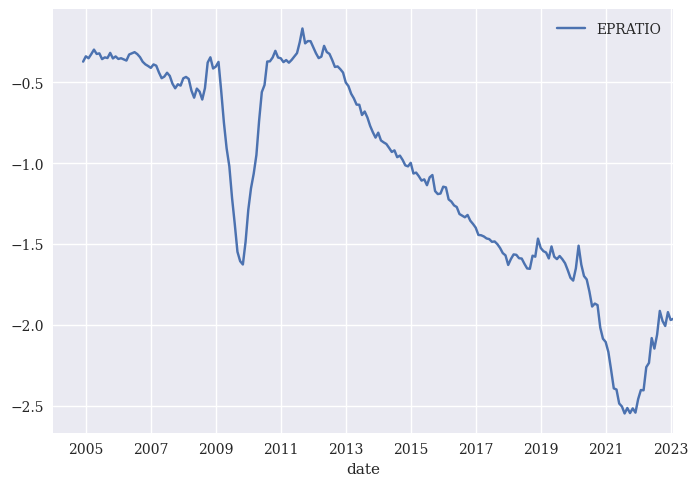

In [30]:
EPRATIO.plot()

In [31]:
interest_rates

,1-Month,3-Month,10-Year,term_spread
Date,,,,
2004-01-31,0.0085,0.0092,0.0416,0.0324
2004-02-29,0.0095,0.0096,0.0399,0.0303
2004-03-31,0.0096,0.0095,0.0386,0.0291
2004-04-30,0.0083,0.0098,0.0453,0.0355
2004-05-31,0.0094,0.0108,0.0466,0.0358
...,...,...,...,...
2022-10-31,0.0373,0.0422,0.0410,-0.0012
2022-11-30,0.0407,0.0437,0.0368,-0.0069
2022-12-31,0.0412,0.0442,0.0388,-0.0054


In [32]:
spy_earnings_yield.resample('M').last()

,MKT_EPS
Date,
2004-01-31,4.40
2004-02-29,4.45
2004-03-31,4.63
2004-04-30,4.71
2004-05-31,4.97
...,...
2022-10-31,4.97
2022-11-30,4.71
2022-12-31,4.78


In [33]:
market.resample('M').last()

,adj_close
date,
2004-01-31,78.531486
2004-02-29,79.597207
2004-03-31,78.546884
2004-04-30,77.060675
2004-05-31,78.380209
...,...
2022-10-31,384.423639
2022-11-30,405.794333
2022-12-31,382.430000


In [34]:
spy_earnings_yield.resample('M').first()

,MKT_EPS
Date,
2004-01-31,4.40
2004-02-29,4.45
2004-03-31,4.63
2004-04-30,4.71
2004-05-31,4.97
...,...
2022-10-31,5.02
2022-11-30,4.78
2022-12-31,4.78


In [35]:
data_copy = data.copy()

In [36]:
def filter_trade_type(trade_type:str):
    if trade_type == 'Purchase':
        trade_type = 'Buy'
    elif trade_type == 'purchase':
        trade_type = 'Buy'
    elif trade_type == 'sale':
        trade_type = 'Sell'
    elif trade_type == 'Sale (Partial)':
        trade_type = 'Sell'
    elif trade_type == 'sale_partial':
        trade_type = 'Sell'
    elif trade_type == 'Sale (Full)':
        trade_type = 'Sell'
    elif trade_type == 'sale_full':
        trade_type = 'Sell'
    return trade_type

In [37]:
data_copy['type']  = data_copy['type'].apply(filter_trade_type)

In [38]:
data_copy = data_copy[(data_copy.type == "Buy")|(data_copy.type == "Sell")]

In [39]:
data_copy.head(5)

,disclosure_date,transaction_date,ticker,asset_description,type,amount,representative,party,state,industry,sector
disclosure_date,,,,,,,,,,,
2014-01-31,2014-01-31,1/24/2014,GE,General Electric Company (NYSE),Sell,"$1,001 - $15,000",Susan M. Collins,Republican,ME,Consumer Electronics/Appliances,Energy
2014-01-31,2014-01-31,1/24/2014,CRM,"Salesforce.com, Inc (NYSE)",Buy,"$1,001 - $15,000",Susan M. Collins,Republican,ME,Computer Software: Prepackaged Software,Technology
2014-01-31,2014-01-31,1/24/2014,FB,"Facebook, Inc. (NASDAQ)",Buy,"$1,001 - $15,000",Susan M. Collins,Republican,ME,"Computer Software: Programming, Data Processing",Technology
2014-01-31,2014-01-31,1/28/2014,EBAY,eBay Inc. (NASDAQ),Sell,"$1,001 - $15,000",Susan M. Collins,Republican,ME,Business Services,Miscellaneous
2014-01-31,2014-01-31,1/29/2014,C,"Citigroup, Inc. (NYSE)",Sell,"$1,001 - $15,000",Susan M. Collins,Republican,ME,Major Banks,Finance


- Constructing PTI **Person-Based-Trading Index**

In [40]:
PTI_df = data_copy[['transaction_date','ticker','type']]

In [41]:
p = data_copy[['ticker','type','representative']]
p['Date'] = p.index

In [42]:
p.head(3)

,ticker,type,representative,Date
disclosure_date,,,,
2014-01-31,GE,Sell,Susan M. Collins,2014-01-31
2014-01-31,CRM,Buy,Susan M. Collins,2014-01-31
2014-01-31,FB,Buy,Susan M. Collins,2014-01-31


In [43]:
trades_grouped = p.groupby([pd.Grouper(key='Date'),'representative','ticker','type']).nunique().reset_index()


In [44]:
trades_grouped

,Date,representative,ticker,type
0,2014-01-31,Susan M. Collins,C,Sell
1,2014-01-31,Susan M. Collins,CRM,Buy
2,2014-01-31,Susan M. Collins,EBAY,Sell
3,2014-01-31,Susan M. Collins,FB,Buy
4,2014-01-31,Susan M. Collins,GE,Sell
...,...,...,...,...
17187,2023-02-17,Neal P. Dunn,KEY$J,Sell
17188,2023-02-17,Neal P. Dunn,RF$A,Sell
17189,2023-02-17,Neal P. Dunn,SO,Sell
17190,2023-02-17,Seth Moulton,ATVI,Sell


In [45]:
trades_grouped = trades_grouped.pivot_table(index = 'Date',columns='type', values='ticker',aggfunc='count').fillna(0)


In [46]:
# Use Trades Grouped to Calculate Trading Index
trades_grouped['Difference'] = trades_grouped['Buy']-trades_grouped['Sell']
trades_grouped['No_Trades'] = trades_grouped['Buy'] + trades_grouped['Sell']

In [47]:
buys_sells = PTI_df.pivot_table(index = PTI_df.index, columns='type',values='ticker',aggfunc='count')
buys_sells = buys_sells.fillna(0)
buys_sells['Difference'] = buys_sells['Buy'] - buys_sells['Sell']
buys_sells['No_Trades'] = buys_sells['Buy'] + buys_sells['Sell']


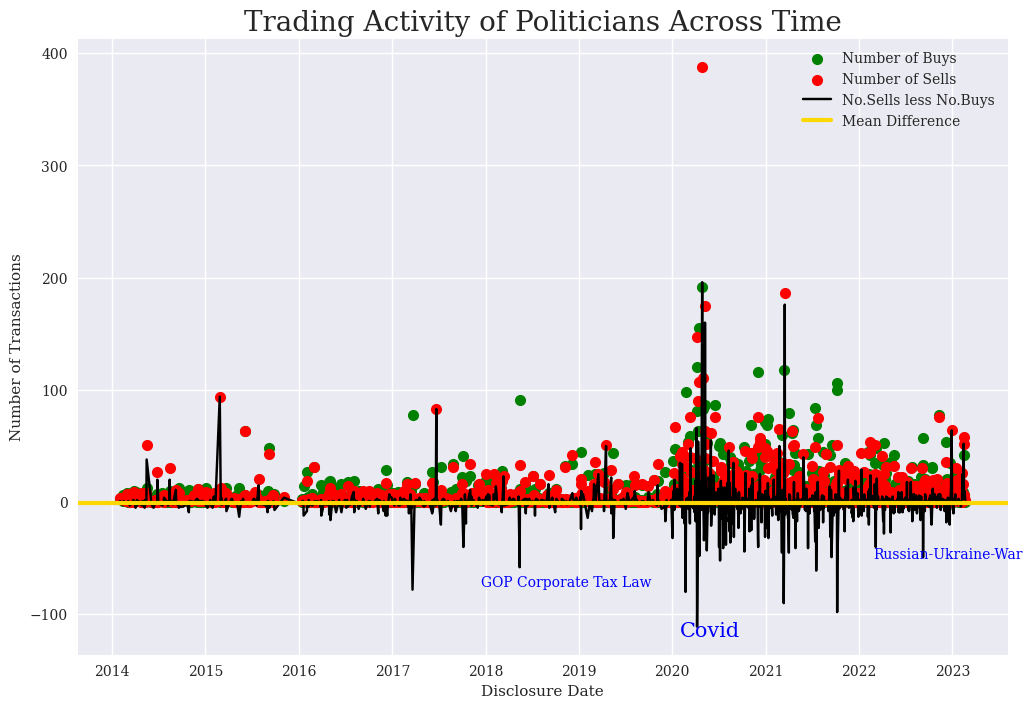

In [48]:
plt.figure(figsize=(12,8))
plt.scatter(buys_sells.index,buys_sells.Buy, c = 'green', label = 'Number of Buys', linewidth = 1)
plt.scatter(buys_sells.index,buys_sells.Sell, c = 'red', label = 'Number of Sells', linewidth = 1)
plt.plot(buys_sells.Sell- buys_sells.Buy,c='black',label= 'No.Sells less No.Buys')
plt.axhline((buys_sells.Sell-buys_sells.Buy).mean(), label = 'Mean Difference', linewidth = 3,color = 'gold')
plt.text(pd.to_datetime('2020-01-30'), -120,'Covid', c ='blue', fontsize = 15)
plt.text(pd.to_datetime('2022-02-24'),-50,'Russian-Ukraine-War', c = 'blue', fontsize = 10)
plt.text(pd.to_datetime('2017-12-15'),-75,'GOP Corporate Tax Law', c = 'blue', fontsize = 10)
plt.legend(loc =0)
plt.xlabel('Disclosure Date')
plt.ylabel('Number of Transactions')
plt.title('Trading Activity of Politicians Across Time', fontsize = 20)
plt.savefig('Trading_Activity.png')




- As you can see from the chart above there are spikes in the **Number of Buys** and **Number of Sells** on any given disclosure date. It begs the question of why? It is human nature that when it comes to money - generally speaking- we are always motiviated in our self interest. Yes, the **STOCK ACT** is *supposed* to prohibit members of Congress and employees of Congress from using priviate information derived from their official positions for their personal benefit. In the court of law, proving such insider trading is probably impossible and not a top priority for the Department of Justice. With that being said, I believe we can find a predictive signal from aggregate *buying* and *selling* activity of United States Politicians. 

- Since politicians are privy to sensitive economic, geopolitical, and other important information before others know, we can get a better understanding of their psychological mindset. *Buying* and *Selling* relate to fear and greed. If politicians know senstive macroeconomic information, they will without a doubt react emotionally through buying and selling out of greed or fear. 
- For example, even though many investors *knew* about Covid-19, **many investors did not know** just how bad it would affect the global economy. However, being that polticians are surrouded by top scientists and the most up-to-date information, they have a better perspective on the gravity of the situation. It would make sense they would trade on this knowledge by selling off assets and raising cash to protect their money. 

- In the following week, month, or even quarter markets will begin to *price-in* this negative sentiment.

In [49]:
buy_sell = buys_sells.groupby(pd.Grouper(freq = '3M')).sum()

In [50]:
pti_index = trades_grouped.groupby(pd.Grouper(freq = '1m')).sum()

In [51]:
pti_index

type,Buy,Sell,Difference,No_Trades
Date,,,,
2014-01-31,3.0,3.0,0.0,6.0
2014-02-28,20.0,16.0,4.0,36.0
2014-03-31,23.0,16.0,7.0,39.0
2014-04-30,29.0,24.0,5.0,53.0
2014-05-31,29.0,65.0,-36.0,94.0
...,...,...,...,...
2022-10-31,92.0,87.0,5.0,179.0
2022-11-30,132.0,142.0,-10.0,274.0
2022-12-31,148.0,187.0,-39.0,335.0


In [52]:
pti_index['PTI_Index'] = pti_index.Difference/pti_index['No_Trades']

In [53]:
pti_index = pti_index.fillna(0)

In [54]:
pti_index['PTI_Index'].idxmax()

Timestamp('2015-08-31 00:00:00', freq='M')

In [99]:
t = 'If the index level is 75%, this means 75% of all trades in the time period were buys.'

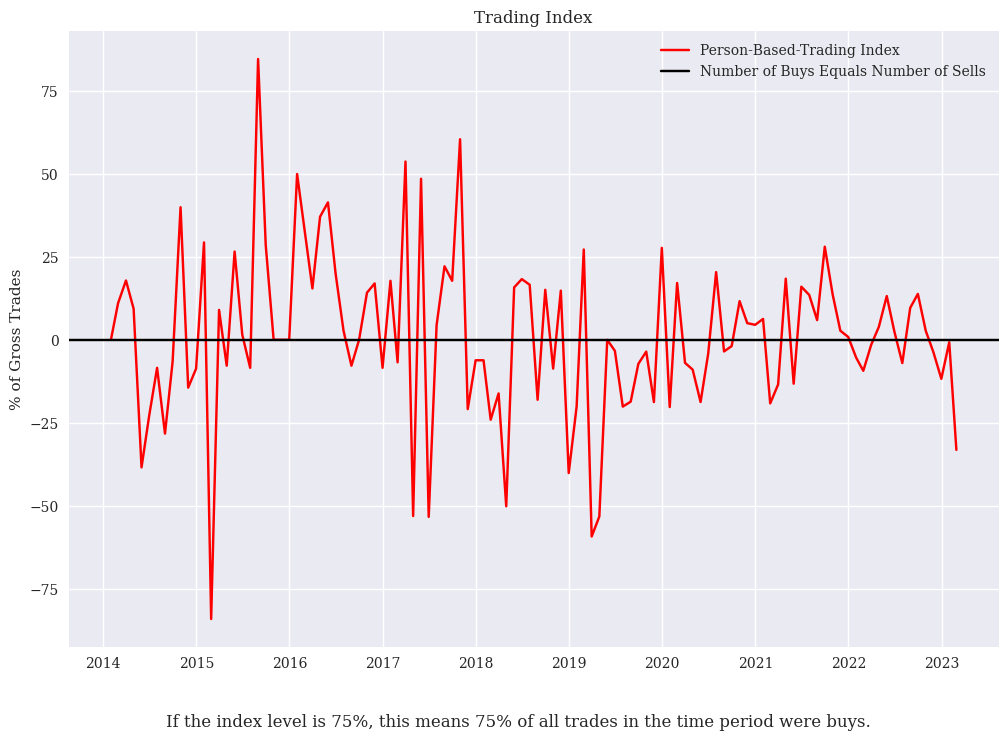

In [100]:
plt.figure(figsize=(12,8))
plt.plot(pti_index['PTI_Index']*100,label = 'Person-Based-Trading Index', c = 'red')
plt.title('Trading Index')
plt.axhline(0,label= 'Number of Buys Equals Number of Sells', c = 'black')
plt.ylabel('% of Gross Trades')
plt.figtext(x = .5,y = 0.01, s = t, fontsize = '12', wrap = True, horizontalalignment = 'center')
plt.legend(loc = 0)


In [101]:
pti_index = pti_index.replace(0,.001)

In [102]:
pti_index['PTI_Index'].std()

0.2506276368215754

In [103]:
# Calculating Z-score PTI_Index
pti_index['Z_PTI_Index'] = (pti_index['PTI_Index']-pti_index['PTI_Index'].mean())/(pti_index['PTI_Index'].std())

In [104]:
trades_grouped

type,Buy,Sell,Difference,No_Trades
Date,,,,
2014-01-31,3.0,3.0,0.0,6.0
2014-02-05,3.0,3.0,0.0,6.0
2014-02-11,6.0,3.0,3.0,9.0
2014-02-14,1.0,2.0,-1.0,3.0
2014-02-25,2.0,1.0,1.0,3.0
...,...,...,...,...
2023-02-13,9.0,15.0,-6.0,24.0
2023-02-14,6.0,47.0,-41.0,53.0
2023-02-15,2.0,6.0,-4.0,8.0


In [105]:
traded_days = market.loc['2014-01-01':'2023-02-21',:].index

In [106]:
buy_sell['PTI_Index'] = buy_sell['Difference']/buy_sell['No_Trades']

In [107]:
buy_sell['PTI_Index'].idxmin()

Timestamp('2015-04-30 00:00:00', freq='3M')

In [108]:
buys_sells.reset_index()

type,disclosure_date,Buy,Sell,Difference,No_Trades
0,2014-01-31,3.0,4.0,-1.0,7.0
1,2014-02-05,3.0,3.0,0.0,6.0
2,2014-02-11,6.0,4.0,2.0,10.0
3,2014-02-14,1.0,2.0,-1.0,3.0
4,2014-02-25,2.0,1.0,1.0,3.0
...,...,...,...,...,...
1245,2023-02-13,9.0,16.0,-7.0,25.0
1246,2023-02-14,6.0,58.0,-52.0,64.0
1247,2023-02-15,3.0,6.0,-3.0,9.0
1248,2023-02-17,42.0,52.0,-10.0,94.0


In [109]:
pti_index

type,Buy,Sell,Difference,No_Trades,PTI_Index,Z_PTI_Index
Date,,,,,,
2014-01-31,3.0,3.0,0.001,6.0,0.001000,-0.044875
2014-02-28,20.0,16.0,4.000,36.0,0.111111,0.394467
2014-03-31,23.0,16.0,7.000,39.0,0.179487,0.667286
2014-04-30,29.0,24.0,5.000,53.0,0.094340,0.327549
2014-05-31,29.0,65.0,-36.000,94.0,-0.382979,-1.576943
...,...,...,...,...,...,...
2022-10-31,92.0,87.0,5.000,179.0,0.027933,0.062587
2022-11-30,132.0,142.0,-10.000,274.0,-0.036496,-0.194485
2022-12-31,148.0,187.0,-39.000,335.0,-0.116418,-0.513370


In [110]:
market.resample('M').last()

,adj_close
date,
2004-01-31,78.531486
2004-02-29,79.597207
2004-03-31,78.546884
2004-04-30,77.060675
2004-05-31,78.380209
...,...
2022-10-31,384.423639
2022-11-30,405.794333
2022-12-31,382.430000


In [111]:
MARKET_RETURNS

,MKT_RETS
date,
2004-01-31,NaN
2004-02-29,0.013571
2004-03-31,-0.013195
2004-04-30,-0.018921
2004-05-31,0.017123
...,...
2022-10-31,0.081276
2022-11-30,0.055592
2022-12-31,-0.057577


# Building Predictive Regression

In [1546]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats

In [1547]:
PTI_lag1 = pti_index[['Z_PTI_Index']].shift(2)
PTI_lag1.columns = ['Z_PTI_Lag2']
#PTI_lag1['Z_PTI_Index_Shift_3'] = pti_index[['Z_PTI_Index']].shift(3)
#PTI_lag1.columns = ['Z_PTI_Lag2', 'Z_PTI_Lag3']

MARKET_lag1 = MARKET_RETURNS.shift(1)
MARKET_lag1.columns = ['MKT_Rets_Lag1']
MARKET_lag2 = MARKET_RETURNS.shift(2)
MARKET_lag2.columns = ['MKT_Rets_lag2']
MARKET_lag3 = MARKET_RETURNS.shift(3)
MARKET_lag3.columns = ['MKT_Rets_Lag3']
MARKET_lag4 = MARKET_RETURNS.shift(4)
MARKET_lag4.columns = ['MKT_Rets_lag4']
MARKET_lag6 = MARKET_RETURNS.shift(6)
MARKET_lag6.columns = ['MKT_Rets_Lag6']
MARKET_lag9 = MARKET_RETURNS.shift(9)
MARKET_lag9.columns = ['MKT_Rets_Lag9']
MARKET_lag12 = MARKET_RETURNS.shift(12)
MARKET_lag12.columns = ['MKT_Rets_Lag12']
MARKET_Lag24 = MARKET_RETURNS.shift(24)
MARKET_Lag24.columns = ['MKT_Rets_Lag24']




In [212]:
corporate_bond_yields.head(3)

,BAA_Yield,AAA_Yield,dsspread
1986-01-02,0.1138,0.0992,0.0146
1986-01-03,0.1135,0.0992,0.0143
1986-01-06,0.1136,0.0994,0.0142


In [1548]:
corporate_bonds = corporate_bond_yields.resample('M').last()

In [1549]:
consumer_sentiment.loc['2014-01-31']

Index   -0.015758
Name: 2014-01-31 00:00:00, dtype: float64

,CPI,inflation_shift,YoY_Change
Date,,,
2005-01-31,190.700,185.200,0.029698
2005-02-28,191.800,186.200,0.030075
2005-03-31,193.300,187.400,0.031483
2005-04-30,194.600,188.000,0.035106
2005-05-31,194.400,189.100,0.028027
...,...,...,...
2022-09-30,296.808,274.310,0.082017
2022-10-31,298.012,276.589,0.077454
2022-11-30,297.711,277.948,0.071103


In [1316]:
EPRATIO.loc['2014-01-31']

EPRATIO   -0.811184
Name: 2014-01-31 00:00:00, dtype: float64

In [1564]:
TB3_Rate_Lag1 = interest_rates[['3-Month']].shift(3)
TB3_Rate_Lag1.columns = ['Three_M_TBill_Lag3']
tsspread_lag1 = interest_rates[['term_spread']].shift(3)
tsspread_lag1.columns = ['term_spread_lag3']
dsspread_lag1 = corporate_bonds[['dsspread']].shift(6)
dsspread_lag1.columns = ['dsspread_lag6']
epratio_lag1 = EPRATIO.shift(1)
epratio_lag1.columns = ['epratio_lag1']
consumer_sentiment_lag1 = consumer_sentiment.shift(3)
oil_lag =  oil_change.shift(2)
oil_lag.columns = ['Oil_Rets_lag2']
inflation_lag1 = inflation[['YoY_Change']].shift(2)
inflation_lag1.columns = ['Inflation_YOY_lag2']

consumer_sentiment_lag1.columns = ['UMICH_Consumer_Sentiment_lag3']


In [1565]:
DATA_MATRIX = PTI_lag1

In [1566]:
DATA_MATRIX = DATA_MATRIX.merge(MARKET_RETURNS,left_index=True,right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(MARKET_lag1, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(MARKET_lag2, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(MARKET_lag3, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(MARKET_lag4, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(MARKET_lag6, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(MARKET_lag12, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(MARKET_Lag24, left_index=True, right_index=True)
# Adding Macroeconomic and other Important Financial Variables

DATA_MATRIX = DATA_MATRIX.merge(TB3_Rate_Lag1, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(tsspread_lag1, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(dsspread_lag1, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(epratio_lag1, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(oil_lag, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(inflation_lag1, left_index=True, right_index=True)
DATA_MATRIX = DATA_MATRIX.merge(consumer_sentiment_lag1, left_index=True, right_index=True)




<AxesSubplot:>

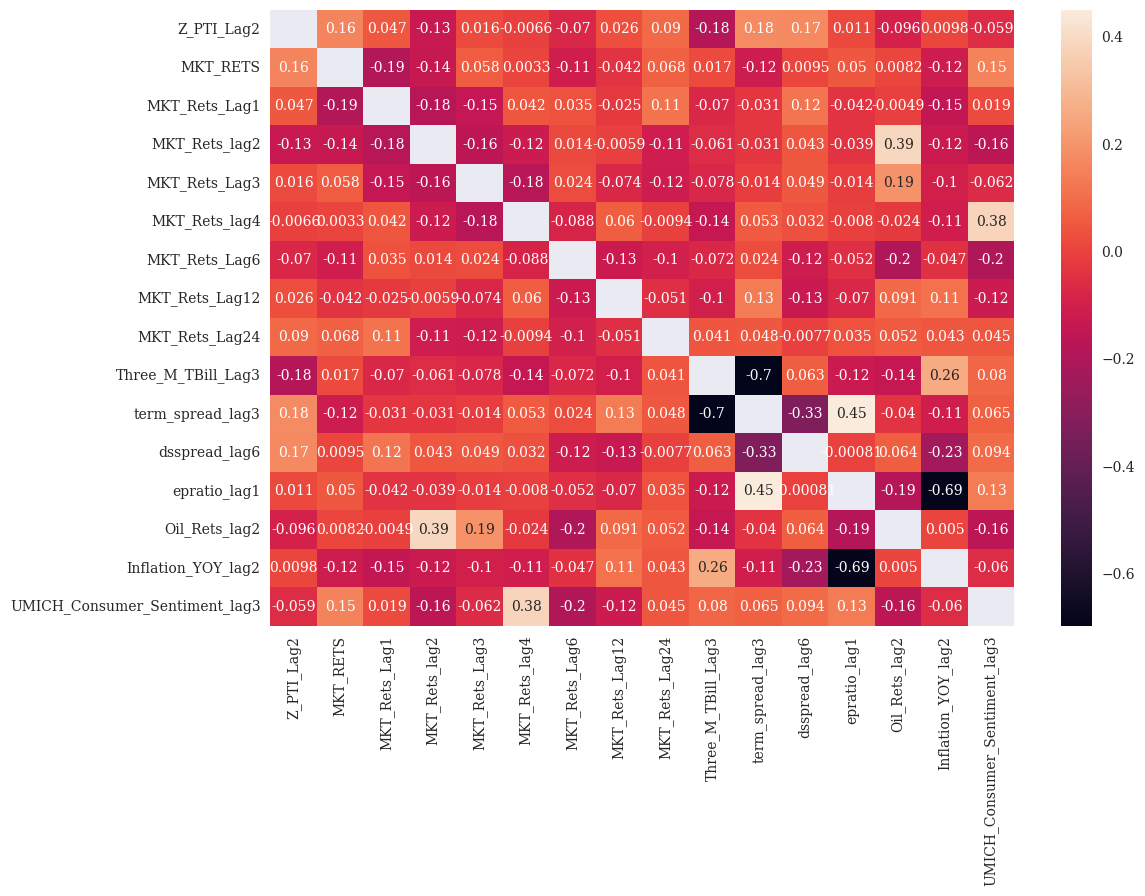

In [1567]:
corr_mat = DATA_MATRIX.corr()
plt.figure(figsize  = (12,8))
corr_mat[corr_mat == 1] = None
sns.heatmap(corr_mat, annot = True)

|       |   PTI_Index |    MKT_RETS |   MKT_Rets_Lag1 |   MKT_Rets_Lag3 |   MKT_Rets_Lag6 |   MKT_Rets_Lag12 |   MKT_Rets_Lag24 |   3_MTB_Rate |   term_spread |     dsspread |    EPRATIO |   UMICH_Consumer_Sentiment |
|:------|------------:|------------:|----------------:|----------------:|----------------:|-----------------:|-----------------:|-------------:|--------------:|-------------:|-----------:|---------------------------:|
| count | 107         | 107         |     107         |     107         |     107         |     107          |      107         | 107          |   107         | 107          | 107        |               107          |
| mean  |   0.0167669 |   0.0101577 |       0.0097769 |       0.0105956 |       0.0113315 |       0.0131051  |        0.0125491 |   0.00825327 |     0.0126953 |   0.00922699 |  -1.58044  |                -0.00218209 |
| std   |   0.251608  |   0.0471054 |       0.0468672 |       0.0461555 |       0.0454044 |       0.0432229  |        0.0443014 |   0.00961234 |     0.007998  |   0.00239073 |   0.446783 |                 0.0504526  |
| min   |  -0.839286  |  -0.198738  |      -0.198738  |      -0.198738  |      -0.198738  |      -0.198738   |       -0.198738  |   0          |    -0.0051    |   0.0054     |  -2.44461  |                -0.194164   |
| 25%   |  -0.0857143 |  -0.0143631 |      -0.0143631 |      -0.0140764 |      -0.0128349 |      -0.00234044 |       -0.0052643 |   0.0005     |     0.00685   |   0.0071     |  -1.91194  |                -0.0237461  |
| 50%   |   0         |   0.0179656 |       0.0179656 |       0.0187079 |       0.0196079 |       0.0197749  |        0.0197749 |   0.0032     |     0.013     |   0.009      |  -1.56317  |                 0.00103199 |
| 75%   |   0.159825  |   0.0344625 |       0.0332733 |       0.0332733 |       0.0343045 |       0.0343045  |        0.0353163 |   0.01555    |     0.0189    |   0.0106     |  -1.22999  |                 0.0286577  |
| max   |   0.846154  |   0.148852  |       0.148852  |       0.148852  |       0.148852  |       0.148852   |        0.148852  |   0.0423     |     0.0293    |   0.019      |  -0.811184 |                 0.130097   |

In [1554]:
DATA_MATRIX.columns

Index(['Z_PTI_Lag2', 'MKT_RETS', 'MKT_Rets_Lag1', 'MKT_Rets_lag2',
       'MKT_Rets_Lag3', 'MKT_Rets_lag4', 'MKT_Rets_Lag6', 'MKT_Rets_Lag12',
       'MKT_Rets_Lag24', 'Three_M_TBill_Lag3', 'term_spread_lag3',
       'dsspread_lag6', 'epratio_lag1', 'Oil_Rets_lag2', 'Inflation_YOY_lag2',
       'UMICH_Consumer_Sentiment_lag3'],
      dtype='object')

In [1568]:
multiple_ols = smf.ols(formula='MKT_RETS ~ Z_PTI_Lag2 + MKT_Rets_Lag1 +MKT_Rets_lag2 + MKT_Rets_Lag3+MKT_Rets_lag4+Three_M_TBill_Lag3 +\
    term_spread_lag3 + dsspread_lag6 +epratio_lag1+Oil_Rets_lag2+I(Oil_Rets_lag2**2)+Inflation_YOY_lag2+I(Inflation_YOY_lag2**2)+UMICH_Consumer_Sentiment_lag3', data = DATA_MATRIX)

In [1569]:
results = multiple_ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MKT_RETS   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     2.416
Date:                Thu, 02 Mar 2023   Prob (F-statistic):            0.00630
Time:                        20:22:43   Log-Likelihood:                 199.40
No. Observations:                 107   AIC:                            -368.8
Df Residuals:                      92   BIC:                            -328.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.0844      0.057      1.474      0.144      -0.029       0.198
Z_PTI_Lag2                        0.0107      0.004      2.512      0.014       0.002       0.019
MKT_Rets_Lag1                    -0.3244      0.103     -3.148      0.002      -0.529      -0.120
MKT_Rets_lag2                    -0.2703      0.122     -2.211      0.029      -0.513      -0.028
MKT_Rets_Lag3                    -0.1581      0.115     -1.371      0.174      -0.387       0.071
MKT_Rets_lag4                    -0.1801      0.118     -1.524      0.131      -0.415       0.055
Three_M_TBill_Lag3               -1.2760      0.997     -1.279      0.204      -3.257       0.705
term_spread_lag3                 -2.3174      1.366     -1.697      0.093      -5.030       0.395
dsspread_lag6                    -2.2095      2.164     -1.021      0.310      -6.508       2.089
epratio_lag1                      0.0109      0.023      0.474      0.636      -0.035       0.056
Oil_Rets_lag2                     0.0525      0.036      1.444      0.152      -0.020       0.125
I(Oil_Rets_lag2 ** 2)             0.1525      0.102      1.502      0.137      -0.049       0.354
Inflation_YOY_lag2                1.0121      1.024      0.988      0.326      -1.022       3.046
I(Inflation_YOY_lag2 ** 2)      -14.2640      9.744     -1.464      0.147     -33.617       5.088
UMICH_Consumer_Sentiment_lag3     0.2203      0.091      2.432      0.017       0.040       0.400
==============================================================================
Omnibus:                       34.633   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.831
Skew:                          -1.229   Prob(JB):                     4.62e-18
Kurtosis:                       6.444   Cond. No.                     4.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1326]:
table = pd.DataFrame({'Beta_Coefficients': results.params,'SE':results.bse,'t_stat':results.tvalues,'pval':results.pvalues})
table = np.round(table, 5)

In [1327]:
predictions = pd.DataFrame(results.fittedvalues, columns=['Forecasted_Market_Return'])
observed_values  = DATA_MATRIX[['MKT_RETS']]
dependendent_variables = predictions.join(observed_values, how = 'inner')
errors = pd.DataFrame(results.resid,columns=['Residuals'])

In [1328]:
dependendent_variables.corr()

,Forecasted_Market_Return,MKT_RETS
Forecasted_Market_Return,1.000000,0.518441
MKT_RETS,0.518441,1.000000


In [1299]:
txt = 'Correlation Coefficient Between Predicted returns and Observed Returns is equal to 48.116% on a monthly basis'

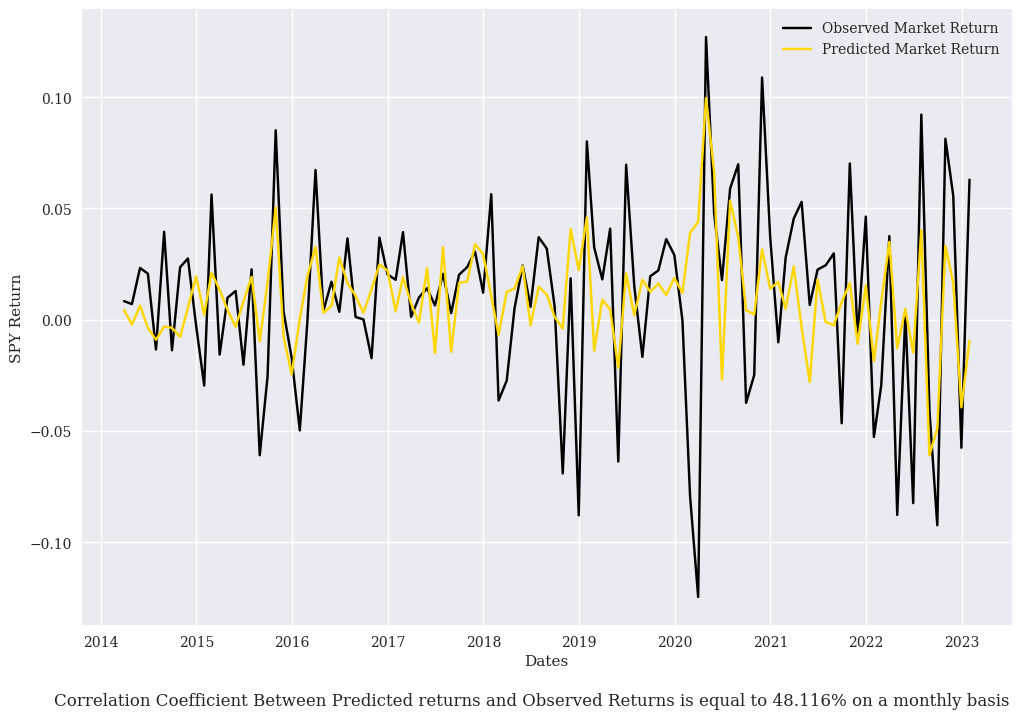

In [1219]:
plt.figure(figsize=(12,8))

plt.plot(dependendent_variables.MKT_RETS, color = 'black',label = 'Observed Market Return')
plt.plot(dependendent_variables['Forecasted_Market_Return'], color = 'gold',label ='Predicted Market Return')
plt.figtext(x = .5,y = 0.01, s = txt, fontsize = '12', wrap = True, horizontalalignment = 'center')
plt.ylabel('SPY Return')
plt.xlabel('Dates')
plt.legend(loc = 0)

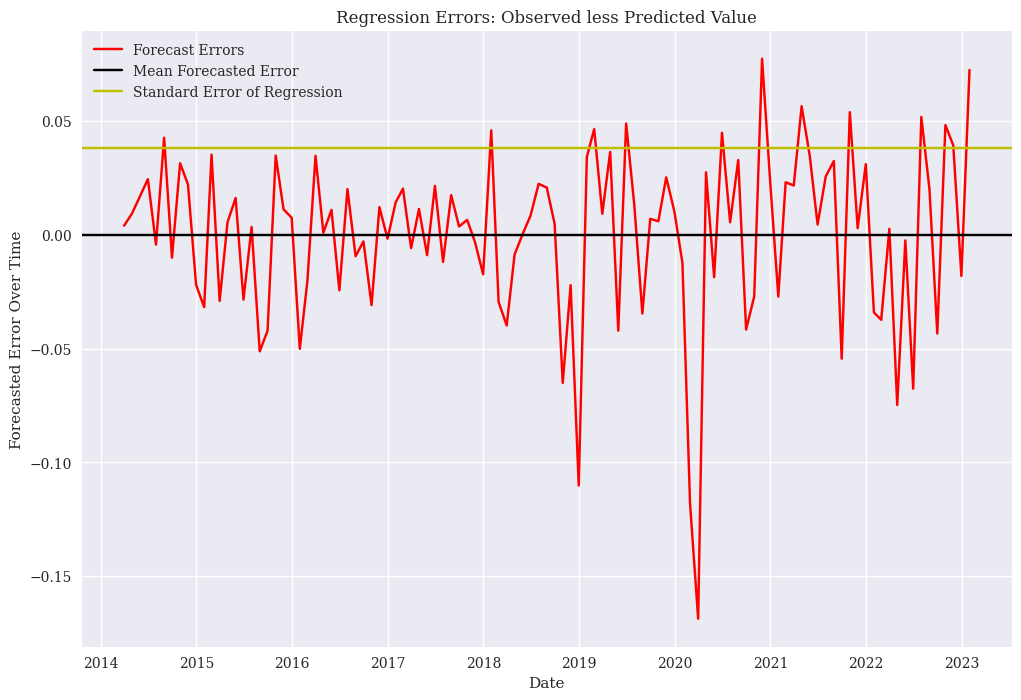

In [1220]:
plt.figure(figsize=(12,8))
plt.plot(errors, label = 'Forecast Errors', c = 'red')
plt.axhline(0,label = 'Mean Forecasted Error', c= 'black')
plt.axhline(errors.std().values, label = 'Standard Error of Regression', c = 'y')
plt.title('Regression Errors: Observed less Predicted Value')
plt.xlabel('Date')
plt.ylabel('Forecasted Error Over Time')

plt.legend(loc = 0)

# Interpretation of Multiple Linear Regression Equation

|                          |   Beta_Coefficients |      SE |   t_stat |    pval |
|:-------------------------|--------------------:|--------:|---------:|--------:|
| Intercept                |             0.13837 | 0.04365 |  3.17004 | 0.00206 |
| Z_PTI_Index              |             0.00769 | 0.00446 |  1.72353 | 0.08812 |
| MKT_Rets_Lag1            |            -0.29384 | 0.10833 | -2.71235 | 0.00796 |
| MKT_Rets_Lag3            |            -0.15536 | 0.1018  | -1.52605 | 0.13039 |
| MKT_Rets_Lag6            |            -0.09559 | 0.10216 | -0.93573 | 0.35184 |
| MKT_Rets_Lag12           |            -0.14332 | 0.10492 | -1.3659  | 0.17526 |
| MKT_Rets_Lag24           |             0.13525 | 0.10218 |  1.32368 | 0.18885 |
| Three_M_TBill            |            -1.59604 | 0.691   | -2.30975 | 0.02311 |
| term_spread              |            -2.51809 | 0.98628 | -2.55312 | 0.0123  |
| dsspread                 |            -6.97395 | 2.17922 | -3.20021 | 0.00188 |
| EPRATIO                  |             0.00826 | 0.01212 |  0.68095 | 0.4976  |
| UMICH_Consumer_Sentiment |            -0.05526 | 0.10448 | -0.52889 | 0.59814 |

- With a *p-value* of 0.08812 we have fairly strong evidence against the null hypothesis that a **Z_score Coefficient on the lagged 3-month PTI Index** is statistically significant. I am happy to have found economic signficance in this regression while controlling for many different variables. Holding other factors fixed, we can say that a one standard deviation increase in the lagged 3-month **Politican Trading Index** will predict $.00769\cdot 0.25 = 0.0019225$ or about 20 basis point increase in the 1-month market returns. 

- This provides solid evidence that elevated levels of politicians trading stocks does indicate causal effects on future market returns. 

# Econometric Analysis 

- Here I am going to implement a probit model, to get a better sense of trying to predict the general direction of future market returns. Since predicting future returns is impractical in the long-run, I do believe, predicting general future market movements is possible using a probistic regression.

- Below I will define a binary response variable where $y=1$ if market return is positive and $y = 0$ if the market return in the monthly period is negative. 

In [1221]:
def _filter_mkt_rets(df:pd.DataFrame):
    if df >= 0:
        mkt_ret = 1
    else:
        mkt_ret = 0
    
    return mkt_ret




In [1222]:
pd.DataFrame(MARKET_RETURNS.MKT_RETS.apply(_filter_mkt_rets)).rename(columns={'MKT_RETS':'Direction'})

,Direction
date,
2004-01-31,0
2004-02-29,1
2004-03-31,0
2004-04-30,0
2004-05-31,1
...,...
2022-10-31,1
2022-11-30,1
2022-12-31,0


In [1300]:
direction_df = pd.DataFrame(MARKET_RETURNS.MKT_RETS.apply(_filter_mkt_rets)).rename(columns={'MKT_RETS':'Direction'})


In [1358]:
probit_matrix = PTI_lag1

In [1359]:
probit_matrix = probit_matrix.merge(direction_df,left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(MARKET_lag1, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(MARKET_lag2, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(MARKET_lag3, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(MARKET_lag4, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(MARKET_lag6, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(MARKET_lag12, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(MARKET_Lag24, left_index=True, right_index=True)
# Adding Macroeconomic and other Important Financial Variables

probit_matrix = probit_matrix.merge(TB3_Rate_Lag1, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(tsspread_lag1, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(dsspread_lag1, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(epratio_lag1, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(oil_lag, left_index=True, right_index=True)
probit_matrix = probit_matrix.merge(inflation_lag1, left_index=True, right_index=True)
#probit_matrix = probit_matrix.merge(consumer_sentiment_lag1, left_index=True, right_index=True)

In [1341]:
probit_matrix.corr()


,Z_PTI_Lag2,Direction,MKT_Rets_Lag1,MKT_Rets_lag2,MKT_Rets_Lag3,MKT_Rets_lag4,MKT_Rets_Lag6,MKT_Rets_Lag12,MKT_Rets_Lag24,Three_M_TBill_Lag3,term_spread_lag3,dsspread_lag6,epratio_lag1,Oil_Rets_lag2,Inflation_YOY_lag2,UMICH_Consumer_Sentiment_lag3
Z_PTI_Lag2,1.000000,0.096849,0.047045,-0.129927,0.015798,-0.006583,-0.070425,0.025673,0.090119,-0.183913,0.175250,0.170748,0.011370,-0.095997,0.009778,-0.058877
Direction,0.096849,1.000000,-0.053342,-0.095880,0.030972,-0.061210,0.030654,-0.177829,-0.050135,0.056769,-0.076427,-0.027666,0.069590,0.029140,-0.118779,0.117718
MKT_Rets_Lag1,0.047045,-0.053342,1.000000,-0.178083,-0.146043,0.042182,0.035115,-0.025236,0.112612,-0.070321,-0.030553,0.116539,-0.042253,-0.004867,-0.150114,0.019487
MKT_Rets_lag2,-0.129927,-0.095880,-0.178083,1.000000,-0.161573,-0.123044,0.014455,-0.005885,-0.112086,-0.060930,-0.030772,0.042775,-0.038921,0.390372,-0.124507,-0.162514
MKT_Rets_Lag3,0.015798,0.030972,-0.146043,-0.161573,1.000000,-0.176050,0.023886,-0.073870,-0.119251,-0.078026,-0.013908,0.048755,-0.014268,0.192402,-0.103179,-0.062025
MKT_Rets_lag4,-0.006583,-0.061210,0.042182,-0.123044,-0.176050,1.000000,-0.087543,0.060417,-0.009437,-0.141310,0.053003,0.031667,-0.008017,-0.023507,-0.107853,0.382016
MKT_Rets_Lag6,-0.070425,0.030654,0.035115,0.014455,0.023886,-0.087543,1.000000,-0.127248,-0.100420,-0.071625,0.023949,-0.119253,-0.051703,-0.196676,-0.047214,-0.196421
MKT_Rets_Lag12,0.025673,-0.177829,-0.025236,-0.005885,-0.073870,0.060417,-0.127248,1.000000,-0.051303,-0.103837,0.133561,-0.128984,-0.070216,0.090567,0.106540,-0.119812
MKT_Rets_Lag24,0.090119,-0.050135,0.112612,-0.112086,-0.119251,-0.009437,-0.100420,-0.051303,1.000000,0.040935,0.048448,-0.007678,0.035368,0.051742,0.043438,0.044517
Three_M_TBill_Lag3,-0.183913,0.056769,-0.070321,-0.060930,-0.078026,-0.141310,-0.071625,-0.103837,0.040935,1.000000,-0.697357,0.062556,-0.124733,-0.137469,0.260168,0.079677


In [ ]:
formula='MKT_RETS ~ Z_PTI_Lag2 + MKT_Rets_Lag1 +MKT_Rets_lag2 + MKT_Rets_Lag3+MKT_Rets_lag4+Three_M_TBill_Lag3 +\
    term_spread_lag3 + dsspread_lag6 +epratio_lag1+Oil_Rets_lag2+I(Oil_Rets_lag2**2)+Inflation_YOY_lag2+I(Inflation_YOY_lag2**2)+UMICH_Consumer_Sentiment_lag3'

In [1243]:
reg_probit = smf.probit(formula='Direction ~ Z_PTI_Lag2 + MKT_Rets_Lag1  + MKT_Rets_Lag6 + MKT_Rets_Lag12 + MKT_Rets_Lag24  +\
    term_spread_lag3 + dsspread_lag6 + epratio_lag1 +Oil_Rets_lag2 + I(Oil_Rets_lag2**2) + Inflation_YOY_lag2 + I(Inflation_YOY_lag2**2)', data = probit_matrix)
results_probit = reg_probit.fit(disp = 0)

In [1360]:
reg_probit = smf.probit(formula='Direction ~Z_PTI_Lag2 + MKT_Rets_Lag1 +MKT_Rets_lag2 + MKT_Rets_Lag3+MKT_Rets_lag4+Three_M_TBill_Lag3 +\
    term_spread_lag3 + dsspread_lag6 +epratio_lag1+Oil_Rets_lag2+I(Oil_Rets_lag2**2)+Inflation_YOY_lag2+I(Inflation_YOY_lag2**2)', data = probit_matrix)
results_probit = reg_probit.fit(disp = 0)

In [1361]:
reg_probit_no_Z = smf.probit(formula='Direction ~  MKT_Rets_Lag1 + MKT_Rets_Lag3 + MKT_Rets_Lag6 + MKT_Rets_Lag12 + MKT_Rets_Lag24  +\
    term_spread_lag3 + dsspread_lag6 + epratio_lag1 + Oil_Rets_lag2 +I(Oil_Rets_lag2**2)+Inflation_YOY_lag2 +I(Inflation_YOY_lag2**2)', data = probit_matrix)

In [1362]:
reg_probit_no_Z.fit(disp = 0).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  109
Model:                         Probit   Df Residuals:                       96
Method:                           MLE   Df Model:                           12
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                 0.08269
Time:                        19:26:41   Log-Likelihood:                -62.055
converged:                       True   LL-Null:                       -67.649
Covariance Type:            nonrobust   LLR p-value:                    0.5129
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.8896      1.168      0.762      0.446      -1.399       3.178
MKT_Rets_Lag1                 -2.2133      3.287     -0.673      0.501      -8.655       4.229
MKT_Rets_Lag3                 -1.9237      3.369     -0.571      0.568      -8.528       4.680
MKT_Rets_Lag6                 -0.4757      3.358     -0.142      0.887      -7.057       6.105
MKT_Rets_Lag12                -6.8582      3.705     -1.851      0.064     -14.119       0.403
MKT_Rets_Lag24                -1.4509      3.451     -0.420      0.674      -8.215       5.313
term_spread_lag3              -9.6356     21.647     -0.445      0.656     -52.063      32.791
dsspread_lag6                -16.6531     68.491     -0.243      0.808    -150.894     117.587
epratio_lag1                   0.3235      0.509      0.636      0.525      -0.674       1.321
Oil_Rets_lag2                  0.6450      1.285      0.502      0.616      -1.874       3.164
I(Oil_Rets_lag2 ** 2)          4.9326      5.649      0.873      0.383      -6.139      16.004
Inflation_YOY_lag2            45.3896     29.895      1.518      0.129     -13.203     103.982
I(Inflation_YOY_lag2 ** 2)  -549.8776    304.734     -1.804      0.071   -1147.146      47.391
==============================================================================================
"""

In [1363]:
results_probit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  107
Model:                         Probit   Df Residuals:                       93
Method:                           MLE   Df Model:                           13
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                  0.1306
Time:                        19:26:43   Log-Likelihood:                -57.475
converged:                       True   LL-Null:                       -66.107
Covariance Type:            nonrobust   LLR p-value:                    0.1875
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.4958      1.977      0.757      0.449      -2.378       5.370
Z_PTI_Lag2                     0.2373      0.159      1.491      0.136      -0.075       0.549
MKT_Rets_Lag1                 -6.5865      4.037     -1.632      0.103     -14.498       1.326
MKT_Rets_lag2                -11.0384      4.786     -2.306      0.021     -20.420      -1.657
MKT_Rets_Lag3                 -7.3897      4.484     -1.648      0.099     -16.177       1.398
MKT_Rets_lag4                 -7.7719      4.022     -1.932      0.053     -15.656       0.112
Three_M_TBill_Lag3           -12.8411     35.417     -0.363      0.717     -82.257      56.574
term_spread_lag3             -32.6852     48.098     -0.680      0.497    -126.956      61.586
dsspread_lag6                -24.4856     75.438     -0.325      0.745    -172.341     123.370
epratio_lag1                   0.3262      0.788      0.414      0.679      -1.218       1.871
Oil_Rets_lag2                  2.0597      1.438      1.433      0.152      -0.758       4.877
I(Oil_Rets_lag2 ** 2)          4.5601      7.648      0.596      0.551     -10.430      19.550
Inflation_YOY_lag2            63.3349     37.126      1.706      0.088      -9.431     136.100
I(Inflation_YOY_lag2 ** 2)  -858.8559    362.557     -2.369      0.018   -1569.455    -148.257
==============================================================================================
"""

In [1351]:
reg_probit.fit(disp =0).params

Intercept                          2.112932
Z_PTI_Lag2                         0.260591
MKT_Rets_Lag1                     -6.736366
MKT_Rets_lag2                    -11.361856
MKT_Rets_Lag3                     -7.847048
MKT_Rets_lag4                    -10.143620
Three_M_TBill_Lag3               -25.915639
term_spread_lag3                 -48.729122
dsspread_lag6                    -49.643729
epratio_lag1                       0.338206
Oil_Rets_lag2                      2.253879
I(Oil_Rets_lag2 ** 2)              3.462377
Inflation_YOY_lag2                61.977158
I(Inflation_YOY_lag2 ** 2)      -842.013281
UMICH_Consumer_Sentiment_lag3      5.022121
dtype: float64

In [1364]:
coef_names = results_probit.model.exog_names
coef_names = np.delete(coef_names,0)

In [1365]:
# Calculating Average Partial Effect
ape_probit = results_probit.get_margeff().margeff

In [1366]:
table_probit = pd.DataFrame({'coef_names': coef_names, 'APE_Probit':ape_probit})

In [1367]:
table_probit

,coef_names,APE_Probit
0,Z_PTI_Lag2,0.072325
1,MKT_Rets_Lag1,-2.007671
2,MKT_Rets_lag2,-3.364707
3,MKT_Rets_Lag3,-2.252509
4,MKT_Rets_lag4,-2.369003
5,Three_M_TBill_Lag3,-3.914195
6,term_spread_lag3,-9.963015
7,dsspread_lag6,-7.463625
8,epratio_lag1,0.099421
9,Oil_Rets_lag2,0.627836


In [1368]:
results_probit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  107
Model:                         Probit   Df Residuals:                       93
Method:                           MLE   Df Model:                           13
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                  0.1306
Time:                        19:27:09   Log-Likelihood:                -57.475
converged:                       True   LL-Null:                       -66.107
Covariance Type:            nonrobust   LLR p-value:                    0.1875
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.4958      1.977      0.757      0.449      -2.378       5.370
Z_PTI_Lag2                     0.2373      0.159      1.491      0.136      -0.075       0.549
MKT_Rets_Lag1                 -6.5865      4.037     -1.632      0.103     -14.498       1.326
MKT_Rets_lag2                -11.0384      4.786     -2.306      0.021     -20.420      -1.657
MKT_Rets_Lag3                 -7.3897      4.484     -1.648      0.099     -16.177       1.398
MKT_Rets_lag4                 -7.7719      4.022     -1.932      0.053     -15.656       0.112
Three_M_TBill_Lag3           -12.8411     35.417     -0.363      0.717     -82.257      56.574
term_spread_lag3             -32.6852     48.098     -0.680      0.497    -126.956      61.586
dsspread_lag6                -24.4856     75.438     -0.325      0.745    -172.341     123.370
epratio_lag1                   0.3262      0.788      0.414      0.679      -1.218       1.871
Oil_Rets_lag2                  2.0597      1.438      1.433      0.152      -0.758       4.877
I(Oil_Rets_lag2 ** 2)          4.5601      7.648      0.596      0.551     -10.430      19.550
Inflation_YOY_lag2            63.3349     37.126      1.706      0.088      -9.431     136.100
I(Inflation_YOY_lag2 ** 2)  -858.8559    362.557     -2.369      0.018   -1569.455    -148.257
==============================================================================================
"""

In [1357]:
table_probit

,coef_names,APE_Probit
0,Z_PTI_Lag2,0.077684
1,MKT_Rets_Lag1,-2.008163
2,MKT_Rets_lag2,-3.387057
3,MKT_Rets_Lag3,-2.339266
4,MKT_Rets_lag4,-3.023892
5,Three_M_TBill_Lag3,-7.725652
6,term_spread_lag3,-14.526528
7,dsspread_lag6,-14.799179
8,epratio_lag1,0.100822
9,Oil_Rets_lag2,0.671899


In [1253]:
stats.norm.cdf(0+.0794)

0.5316427656784903

In [ ]:
stats.norm.cdf(-.6)

0.2742531177500736

In [948]:
results_probit.fittedvalues.mean()

0.5504018397575722

In [892]:
direction_df

,Direction
date,
2004-01-31,0
2004-02-29,1
2004-03-31,0
2004-04-30,0
2004-05-31,1
...,...
2022-10-31,1
2022-11-30,1
2022-12-31,0


In [893]:
direction_df.loc['2016':].value_counts()

Direction
1            62
0            24
dtype: int64

In [894]:
direction_df.value_counts()

Direction
1            153
0             77
dtype: int64

In [1369]:
results_probit.resid_dev

2014-03-31    0.910864
2014-04-30    0.924265
2014-05-31    0.662041
2014-06-30    0.881589
2014-07-31   -1.376999
                ...   
2022-09-30   -0.506306
2022-10-31    0.816170
2022-11-30    1.443587
2022-12-31   -0.862024
2023-01-31    1.240764
Length: 107, dtype: float64

In [1370]:
results_probit.fittedvalues

2014-03-31    0.413687
2014-04-30    0.391746
2014-05-31    0.853114
2014-06-30    0.462130
2014-07-31    0.285865
                ...   
2022-09-30   -1.173496
2022-10-31    0.573132
2022-11-30   -0.377884
2022-12-31   -0.494915
2023-01-31   -0.092552
Length: 107, dtype: float64

(array([ 1.,  4., 15., 37., 19., 21.,  4.,  3.,  0.,  3.]),
 array([-1.17349579, -0.75305621, -0.33261664,  0.08782294,  0.50826251,
         0.92870209,  1.34914166,  1.76958124,  2.19002082,  2.61046039,
         3.03089997]),
 <BarContainer object of 10 artists>)

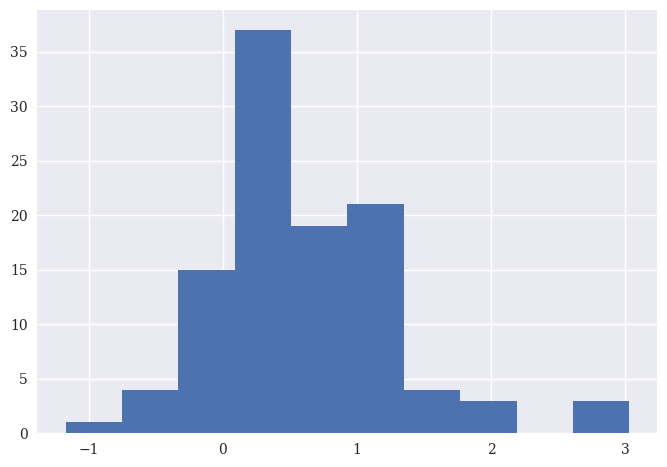

In [1371]:
plt.hist(results_probit.fittedvalues)

In [1372]:
xb_probit = results_probit.fittedvalues
factor_probit = stats.norm.cdf(xb_probit)

In [1373]:
xb_probit

2014-03-31    0.413687
2014-04-30    0.391746
2014-05-31    0.853114
2014-06-30    0.462130
2014-07-31    0.285865
                ...   
2022-09-30   -1.173496
2022-10-31    0.573132
2022-11-30   -0.377884
2022-12-31   -0.494915
2023-01-31   -0.092552
Length: 107, dtype: float64

In [1374]:
cdf_norm = results_probit.fittedvalues.sort_values()

Text(0.5, 1.0, 'Empirical Probistic CDF ')

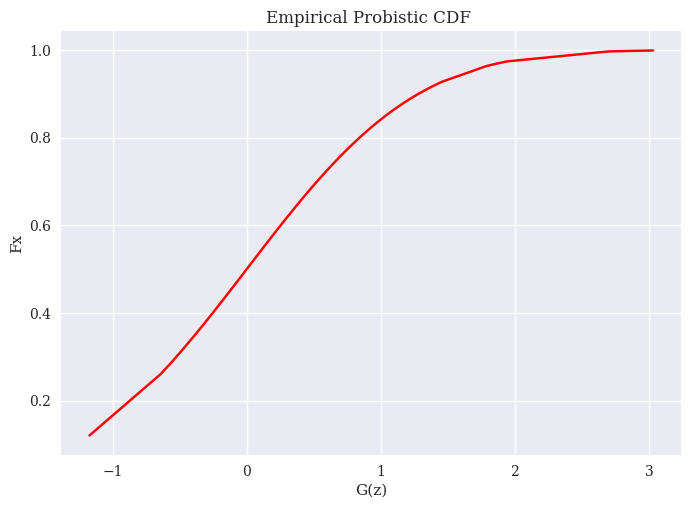

In [1375]:
plt.plot(cdf_norm, stats.norm.cdf(cdf_norm), c = 'r')
plt.ylabel('Fx')
plt.xlabel('G(z)')
plt.title('Empirical Probistic CDF ')

In [714]:
MARKET_RETURNS

,MKT_RETS
date,
2004-01-31,NaN
2004-02-29,0.013571
2004-03-31,-0.013195
2004-04-30,-0.018921
2004-05-31,0.017123
...,...
2022-10-31,0.081276
2022-11-30,0.055592
2022-12-31,-0.057577


In [ ]:
m_ret = market.resample('M').last()

In [ ]:
m_ret

,adj_close
date,
2004-01-31,78.531486
2004-02-29,79.597207
2004-03-31,78.546884
2004-04-30,77.060675
2004-05-31,78.380209
...,...
2022-10-31,384.423639
2022-11-30,405.794333
2022-12-31,382.430000


In [ ]:
ADF_AUT = sm.tsa.stattools.adfuller(m_ret, maxlag = 24,regression = 'ct',regresults=True, autolag=None)


In [ ]:
ADF_AUT_rets = sm.tsa.stattools.adfuller(MARKET_RETURNS.dropna(), regression = 'c', maxlag= 24, autolag = None, regresults=True)

Text(0.5, 0, '0:Negative Monthly Return; 1: Positive Monthly Return')

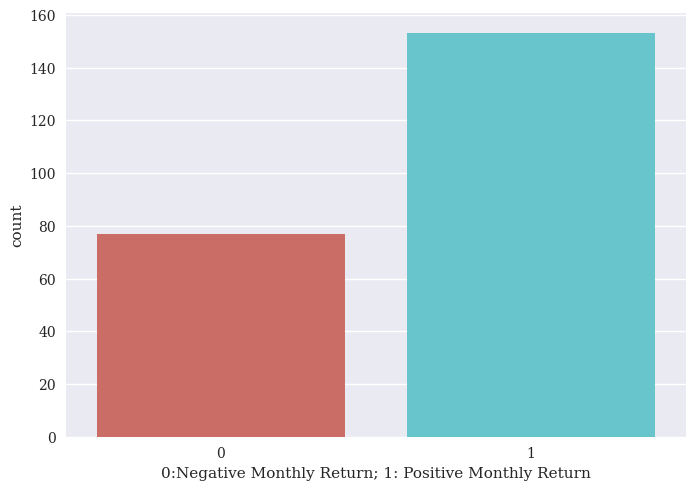

In [715]:
sns.countplot(x = 'Direction', data = direction_df,palette='hls')
plt.xlabel('0:Negative Monthly Return; 1: Positive Monthly Return')

In [1376]:
len(direction_df.loc[direction_df.Direction == 1])/len(direction_df)

0.6652173913043479

Since 2004, there have been 80 months of negative returns and over 140 months of positive returns in the market. 

In [1377]:
results_probit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  107
Model:                         Probit   Df Residuals:                       93
Method:                           MLE   Df Model:                           13
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                  0.1306
Time:                        19:27:59   Log-Likelihood:                -57.475
converged:                       True   LL-Null:                       -66.107
Covariance Type:            nonrobust   LLR p-value:                    0.1875
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.4958      1.977      0.757      0.449      -2.378       5.370
Z_PTI_Lag2                     0.2373      0.159      1.491      0.136      -0.075       0.549
MKT_Rets_Lag1                 -6.5865      4.037     -1.632      0.103     -14.498       1.326
MKT_Rets_lag2                -11.0384      4.786     -2.306      0.021     -20.420      -1.657
MKT_Rets_Lag3                 -7.3897      4.484     -1.648      0.099     -16.177       1.398
MKT_Rets_lag4                 -7.7719      4.022     -1.932      0.053     -15.656       0.112
Three_M_TBill_Lag3           -12.8411     35.417     -0.363      0.717     -82.257      56.574
term_spread_lag3             -32.6852     48.098     -0.680      0.497    -126.956      61.586
dsspread_lag6                -24.4856     75.438     -0.325      0.745    -172.341     123.370
epratio_lag1                   0.3262      0.788      0.414      0.679      -1.218       1.871
Oil_Rets_lag2                  2.0597      1.438      1.433      0.152      -0.758       4.877
I(Oil_Rets_lag2 ** 2)          4.5601      7.648      0.596      0.551     -10.430      19.550
Inflation_YOY_lag2            63.3349     37.126      1.706      0.088      -9.431     136.100
I(Inflation_YOY_lag2 ** 2)  -858.8559    362.557     -2.369      0.018   -1569.455    -148.257
==============================================================================================
"""

- Before I do a rolling probit model to forecast the 1 month market return, I am going to compare the fitted probit models to the observed outcomes

In [1378]:
xb_probit = pd.DataFrame(stats.norm.cdf(results_probit.fittedvalues), index = results_probit.fittedvalues.index)

In [1379]:
xb_probit = xb_probit.merge(direction_df, left_index=True, right_index=True)
xb_probit.columns = ['Predicted_Probability','Direction']

In [1380]:
def probit_filter(df, threshold:float):
    if df > threshold:
        prob = 1
    else:
        prob = 0
    return prob

In [1381]:
xb_probit['Predicted_Direction']  =   xb_probit.Predicted_Probability.apply(probit_filter, threshold = .5)

In [1382]:
xb_probit.loc[xb_probit.Direction== 1].mean()

Predicted_Probability    0.736472
Direction                1.000000
Predicted_Direction      0.945946
dtype: float64

In [1383]:
xb_probit.loc[xb_probit.Direction == 0].mean()

Predicted_Probability    0.585219
Direction                0.000000
Predicted_Direction      0.696970
dtype: float64

In [1384]:
xb_probit.loc[xb_probit['Direction'] == xb_probit['Predicted_Direction']].count()/len(xb_probit)

Predicted_Probability    0.747664
Direction                0.747664
Predicted_Direction      0.747664
dtype: float64

- Using the probit fitted values- if we define a probability of greater than 50% of positive market returns as $1$ and $0$ if the predicted probability of negative market returns is less than or equal to 50%, then we are correct 71.96% of the time. 

- There is one major limitation. Even though this model is pretty accurate, I am unable to use the model estimates because there would be a backward looking bias. 
- To correct for this I am going to use a rolling 15 month forecasting model to predict future spy returns.

In [1410]:
probit_matrix.head(2)


,Z_PTI_Lag2,Direction,MKT_Rets_Lag1,MKT_Rets_lag2,MKT_Rets_Lag3,MKT_Rets_lag4,MKT_Rets_Lag6,MKT_Rets_Lag12,MKT_Rets_Lag24,Three_M_TBill_Lag3,term_spread_lag3,dsspread_lag6,epratio_lag1,Oil_Rets_lag2,Inflation_YOY_lag2
2014-01-31,NaN,0,0.025894,0.029638,0.046307,0.031682,0.051677,0.051190,0.046375,0.0004,0.0253,0.0090,-0.841713,0.002998,0.012371
2014-02-28,NaN,1,-0.035248,0.025894,0.029638,0.046307,-0.029992,0.012759,0.043405,0.0006,0.0269,0.0085,-0.811184,0.008126,0.015017


In [1411]:
DESIGN_MATRIX = probit_matrix[['Z_PTI_Lag2', 'MKT_Rets_Lag1', 'MKT_Rets_lag2',
       'MKT_Rets_Lag3', 'MKT_Rets_lag4','Three_M_TBill_Lag3', 'term_spread_lag3',
       'dsspread_lag6', 'epratio_lag1', 'Oil_Rets_lag2', 'Inflation_YOY_lag2']]

In [1412]:
DESIGN_MATRIX.head(3)

,Z_PTI_Lag2,MKT_Rets_Lag1,MKT_Rets_lag2,MKT_Rets_Lag3,MKT_Rets_lag4,Three_M_TBill_Lag3,term_spread_lag3,dsspread_lag6,epratio_lag1,Oil_Rets_lag2,Inflation_YOY_lag2
2014-01-31,NaN,0.025894,0.029638,0.046307,0.031682,0.0004,0.0253,0.0090,-0.841713,0.002998,0.012371
2014-02-28,NaN,-0.035248,0.025894,0.029638,0.046307,0.0006,0.0269,0.0085,-0.811184,0.008126,0.015017
2014-03-31,-0.044875,0.045516,-0.035248,0.025894,0.029638,0.0007,0.0297,0.0083,-0.859132,-0.032333,0.015789


In [1413]:
DESIGN_MATRIX.insert(10,'Oil_Rets_lag2_squared', DESIGN_MATRIX['Oil_Rets_lag2']**2)
DESIGN_MATRIX.insert(12,'Inflation_YOY_lag2_squared',DESIGN_MATRIX['Inflation_YOY_lag2']**2)

In [1414]:
DESIGN_MATRIX

,Z_PTI_Lag2,MKT_Rets_Lag1,MKT_Rets_lag2,MKT_Rets_Lag3,MKT_Rets_lag4,Three_M_TBill_Lag3,term_spread_lag3,dsspread_lag6,epratio_lag1,Oil_Rets_lag2,Oil_Rets_lag2_squared,Inflation_YOY_lag2,Inflation_YOY_lag2_squared
2014-01-31,NaN,0.025894,0.029638,0.046307,0.031682,0.0004,0.0253,0.0090,-0.841713,0.002998,0.000009,0.012371,0.000153
2014-02-28,NaN,-0.035248,0.025894,0.029638,0.046307,0.0006,0.0269,0.0085,-0.811184,0.008126,0.000066,0.015017,0.000226
2014-03-31,-0.044875,0.045516,-0.035248,0.025894,0.029638,0.0007,0.0297,0.0083,-0.859132,-0.032333,0.001045,0.015789,0.000249
2014-04-30,0.394467,0.008311,0.045516,-0.035248,0.025894,0.0002,0.0265,0.0074,-0.871158,0.014074,0.000198,0.011263,0.000127
2014-05-31,0.667286,0.006952,0.008311,0.045516,-0.035248,0.0005,0.0261,0.0074,-0.881095,-0.017372,0.000302,0.015122,0.000229
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,-0.324036,-0.040802,0.092087,-0.082469,0.002257,0.0172,0.0126,0.0087,-2.058551,-0.041176,0.001696,0.085248,0.007267
2022-10-31,0.339050,-0.092417,-0.040802,0.092087,-0.082469,0.0241,0.0026,0.0093,-1.912029,-0.088416,0.007817,0.082627,0.006827
2022-11-30,0.506263,0.081276,-0.092417,-0.040802,0.092087,0.0296,0.0019,0.0103,-1.973747,-0.086105,0.007414,0.082017,0.006727
2022-12-31,0.062587,0.055592,0.081276,-0.092417,-0.040802,0.0333,0.0050,0.0110,-2.005080,0.008989,0.000081,0.077454,0.005999


In [1879]:
_probit_estimator(probit_matrix)

Intercept                       1.495842
Z_PTI_Lag2                      0.237274
MKT_Rets_Lag1                  -6.586468
MKT_Rets_lag2                 -11.038431
MKT_Rets_Lag3                  -7.389699
MKT_Rets_lag4                  -7.771874
Three_M_TBill_Lag3            -12.841110
term_spread_lag3              -32.685184
dsspread_lag6                 -24.485556
epratio_lag1                    0.326166
Oil_Rets_lag2                   2.059712
I(Oil_Rets_lag2 ** 2)           4.560067
Inflation_YOY_lag2             63.334865
I(Inflation_YOY_lag2 ** 2)   -858.855876
dtype: float64

In [1404]:
def _probit_estimator(df:pd.DataFrame):
    temp_model = smf.probit(formula='Direction ~Z_PTI_Lag2 + MKT_Rets_Lag1 +MKT_Rets_lag2 + MKT_Rets_Lag3+MKT_Rets_lag4+Three_M_TBill_Lag3 +\
    term_spread_lag3 + dsspread_lag6 +epratio_lag1+Oil_Rets_lag2+I(Oil_Rets_lag2**2)+Inflation_YOY_lag2+I(Inflation_YOY_lag2**2)', data = df).fit(disp = 0).params

    return temp_model

In [1406]:
def expanding_probit_model(window: int, df: pd.DataFrame,x_matrix: pd.DataFrame):
    n_rows = df.shape[0]
    data = df.copy()
    x_mat = sm.add_constant(x_matrix.copy())
    
    start = window
    predictions = list()
    for i in range(start, len(data)):


        window_data = data.iloc[0:start]

        model = _probit_estimator(window_data)
        coef = model.values
        
        next_month_data = x_mat.iloc[i:i+1]
        

        prediction = next_month_data@ coef
        predictions.append(stats.norm.cdf(prediction.values[0]))

    prediction_series = pd.Series(predictions,index = df.index[start:])


    return prediction_series


In [1942]:
expanding = pd.DataFrame(expanding_probit_model(60,probit_matrix, DESIGN_MATRIX), columns=['Expanding_Predicted_Direction'])

In [1943]:
expanding['Predicted_Direction'] = expanding.Expanding_Predicted_Direction.apply(probit_filter, threshold = .7)

In [1944]:
expanding = expanding.merge(direction_df, left_index=True, right_index=True)


In [1475]:
def convert_month_days(df:pd.DataFrame):
    nrows = df.shape[0]
    month_days = list()
    for idx in range(nrows):
        month_date = datetime.strftime(df.index[idx],'%b%Y')
        month_days.append(month_date)
    return month_days


In [1945]:
expanding.describe()

,Expanding_Predicted_Direction,Predicted_Direction,Direction
count,49.000000,49.000000,49.000000
mean,0.852870,0.816327,0.653061
std,0.250230,0.391230,0.480929
min,0.001146,0.000000,0.000000
25%,0.815403,1.000000,0.000000
50%,0.994418,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [1946]:
expanding.loc[expanding.Direction == 1].mean()

Expanding_Predicted_Direction    0.845149
Predicted_Direction              0.812500
Direction                        1.000000
dtype: float64

In [1947]:
expanding.loc[expanding.Direction == 0].mean()

Expanding_Predicted_Direction    0.867404
Predicted_Direction              0.823529
Direction                        0.000000
dtype: float64

In [1948]:
expanding['month_year'] = convert_month_days(expanding)

In [1468]:
len(expanding)

49

In [1949]:
expanding.loc[expanding['Predicted_Direction'] == expanding['Direction']].count()/len(expanding)

Expanding_Predicted_Direction    0.591837
Predicted_Direction              0.591837
Direction                        0.591837
month_year                       0.591837
dtype: float64

In [1950]:
len(expanding.loc[(expanding.Predicted_Direction ==1)&(expanding.Direction == 1)])/len(expanding.loc[expanding.Direction == 1])

0.8125

In [1951]:
len(expanding.loc[(expanding.Predicted_Direction==0) &(expanding.Direction == 0)])/len(expanding.loc[expanding.Direction == 0])

0.17647058823529413

# 58% Accuracy

In [1952]:
xb_probit.loc[xb_probit['Direction'] == xb_probit['Predicted_Direction']].count()/len(xb_probit)

Predicted_Probability    0.747664
Direction                0.747664
Predicted_Direction      0.747664
dtype: float64

# Trading Strategy

In [361]:
import pandas_market_calendars as mcal
nyse = mcal.get_calendar('NYSE')

In [319]:
trade_strat_tickers = ['SPY','SQQQ','TQQQ','TTT','UPRO','SDS']

In [1797]:
trade_data = quandl.get_table('QUOTEMEDIA/PRICES', ticker = trade_strat_tickers, qopts = {'columns':['date','ticker','adj_close']},paginate = True, date = {'gte':'2000-01-01','lte':'2023-03-01'}).set_index('date').sort_index()

In [1798]:
trade_df_full = trade_data.pivot_table(columns='ticker',values = 'adj_close', index = trade_data.index)
trade_df_cleaned = trade_data.pivot_table(columns='ticker',values = 'adj_close', index = trade_data.index).dropna()
trade_df_daily_rets = trade_df_cleaned.pct_change().dropna()
trade_df_monthly_rets = trade_df_cleaned.resample('M').last().pct_change().dropna()

In [1794]:
trade_df_monthly_rets.mean()

ticker
SDS    -0.021536
SPY     0.010264
SQQQ   -0.044586
TQQQ    0.034206
TTT     0.015431
UPRO    0.026440
dtype: float64

In [1800]:
trade_df_full

ticker,SDS,SPY,SQQQ,TQQQ,TTT,UPRO
date,,,,,,
2000-01-03,NaN,95.242907,NaN,NaN,NaN,NaN
2000-01-04,NaN,91.518324,NaN,NaN,NaN,NaN
2000-01-05,NaN,91.682042,NaN,NaN,NaN,NaN
2000-01-06,NaN,90.208581,NaN,NaN,NaN,NaN
2000-01-07,NaN,95.447554,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-02-23,42.12,400.660000,37.85,22.93,69.8800,36.57
2023-02-24,43.05,396.380000,39.79,21.77,72.9336,35.39
2023-02-27,42.78,397.730000,38.93,22.24,72.2134,35.73


In [1795]:
trade_df_daily_rets.corr()

ticker,SDS,SPY,SQQQ,TQQQ,TTT,UPRO
ticker,,,,,,
SDS,1.000000,-0.999098,0.926684,-0.926682,-0.076687,-0.999116
SPY,-0.999098,1.000000,-0.926823,0.927049,0.076449,0.999055
SQQQ,0.926684,-0.926823,1.000000,-0.999287,-0.042139,-0.926162
TQQQ,-0.926682,0.927049,-0.999287,1.000000,0.041446,0.926306
TTT,-0.076687,0.076449,-0.042139,0.041446,1.000000,0.077200
UPRO,-0.999116,0.999055,-0.926162,0.926306,0.077200,1.000000


In [1499]:
trade_df_monthly_rets.corr()

ticker,SDS,SPY,SQQQ,TQQQ,TTT,UPRO
ticker,,,,,,
SDS,1.000000,-0.974636,0.916123,-0.900947,-0.237441,-0.954835
SPY,-0.974636,1.000000,-0.861832,0.923184,0.253048,0.996417
SQQQ,0.916123,-0.861832,1.000000,-0.931574,-0.152521,-0.833085
TQQQ,-0.900947,0.923184,-0.931574,1.000000,0.206202,0.921712
TTT,-0.237441,0.253048,-0.152521,0.206202,1.000000,0.249738
UPRO,-0.954835,0.996417,-0.833085,0.921712,0.249738,1.000000


In [1787]:
# Getting Funding Rates
repo = (quandl.get('YC/USA1M', start_date = '2000-01-01', end_date = '2023-03-01', returns = 'pandas')-1)*(1/100)
repo.columns = ['Funding_Rate']

In [2034]:
def probit_trade_strategy(initial_equity: float,forecast_df:pd.DataFrame, price_df:pd.DataFrame, funding_rates:pd.DataFrame, long_positions_only = False):
    initial_capital = initial_equity
    predictor_df = forecast_df.copy()
    prices = price_df.copy()
    prices = prices[['SPY']]
    collateral_rate = funding_rates.copy()

    trade_station = pd.DataFrame(columns= ['Capital','Entry_Date', 'Exit_Date', 'No_Shares','Rebate_Rate','NET_Interest','Entry_Value', 'Exit_Value','PNL', 'Cumulative_PNL','ROC'])

    for idx in predictor_df.index:
        equity = initial_capital
        month_year = str(idx)[0:7]
        entry_date = prices.loc[month_year].index[0]
        exit_date = prices.loc[month_year].index[-1]
        trade_station.loc[entry_date,'Capital'] = equity
        trade_station.loc[entry_date,'Entry_Date'] = entry_date
        trade_station.loc[entry_date,'Exit_Date'] = exit_date
        trade_station.loc[entry_date,'Rebate_Rate'] = collateral_rate.loc[entry_date].values[0]
        rate = collateral_rate.loc[entry_date].values[0]

        if long_positions_only == False:
            if predictor_df.loc[idx,'Predicted_Direction'] == 1:
            
                trade_station.loc[entry_date,'No_Shares'] = np.floor(equity/prices.loc[entry_date].values[0])
                trade_station.loc[entry_date,'NET_Interest'] = 0
                shares = trade_station.loc[entry_date,'No_Shares']
                trade_station.loc[entry_date,'Entry_Value'] = prices.loc[entry_date].values[0]  * shares
                entry_val = trade_station.loc[entry_date,'Entry_Value']

                trade_station.loc[entry_date,'Exit_Value'] = prices.loc[exit_date].values[0]*shares
                exit_val = trade_station.loc[entry_date,'Exit_Value']
                trade_station.loc[entry_date,'PNL'] = exit_val - entry_val

                trade_station.loc[entry_date,'ROC'] = (exit_val-entry_val)/entry_val

                initial_capital += trade_station.loc[entry_date,'PNL']
        
            else:

                trade_station.loc[entry_date,'No_Shares'] = - np.floor(equity/prices.loc[entry_date].values[0])
                shares = trade_station.loc[entry_date,'No_Shares']
                trade_station.loc[entry_date,'Entry_Value'] = prices.loc[entry_date].values[0]  * shares
                entry_val = trade_station.loc[entry_date,'Entry_Value']
                trade_station.loc[entry_date,'NET_Interest'] = - ((((exit_date-entry_date).days) *rate)/360)*entry_val
                net_interest = trade_station.loc[entry_date,'NET_Interest']

                trade_station.loc[entry_date,'Exit_Value'] = prices.loc[exit_date].values[0]*shares
                exit_val = trade_station.loc[entry_date,'Exit_Value']
                trade_station.loc[entry_date,'PNL'] = (exit_val+net_interest) - entry_val

                trade_station.loc[entry_date,'ROC'] = (exit_val-entry_val)/entry_val

                initial_capital += trade_station.loc[entry_date,'PNL']

        else:
            if predictor_df.loc[idx,'Predicted_Direction'] == 1:
            
                trade_station.loc[entry_date,'No_Shares'] = np.floor(equity/prices.loc[entry_date].values[0])
                trade_station.loc[entry_date,'NET_Interest'] = 0
                shares = trade_station.loc[entry_date,'No_Shares']
                trade_station.loc[entry_date,'Entry_Value'] = prices.loc[entry_date].values[0]  * shares
                entry_val = trade_station.loc[entry_date,'Entry_Value']

                trade_station.loc[entry_date,'Exit_Value'] = prices.loc[exit_date].values[0]*shares
                exit_val = trade_station.loc[entry_date,'Exit_Value']
                trade_station.loc[entry_date,'PNL'] = exit_val - entry_val

                trade_station.loc[entry_date,'ROC'] = (exit_val-entry_val)/entry_val

                initial_capital += trade_station.loc[entry_date,'PNL']
            else:
                trade_station.loc[entry_date,'Entry_Date'] = entry_date
                trade_station.loc[entry_date,'Exit_Date'] = exit_date
                
                trade_station.loc[entry_date,'PNL'] = 0
                


    
    trade_station['Cumulative_PNL'] = trade_station['PNL'].cumsum()
    
    return trade_station.fillna(0)
            
    

    
    
            





In [1501]:
trade_df_cleaned.loc['2017-01-03']

ticker
SDS      287.151924
SPY      202.738081
SQQQ    4864.132731
TQQQ       5.389414
TTT       31.606009
UPRO      13.725436
Name: 2017-01-03 00:00:00, dtype: float64

In [2035]:
probit_trade_strategy(100000,expanding,trade_df_cleaned,repo,long_positions_only=True)

,Capital,Entry_Date,Exit_Date,No_Shares,Rebate_Rate,NET_Interest,Entry_Value,Exit_Value,PNL,Cumulative_PNL,ROC
2019-01-02,100000.000000,2019-01-02,2019-01-31,427.0,0.0140,0,99894.558520,107780.550728,7885.992209,7885.992209,0.078943
2019-02-01,107885.992209,2019-02-01,2019-02-28,427.0,0.0141,0,107832.458525,111274.344745,3441.886220,11327.878428,0.031919
2019-03-01,111327.878428,2019-03-01,2019-03-29,0.0,0.0144,0,0.000000,0.000000,0.000000,11327.878428,0.000000
2019-04-01,111327.878428,2019-04-01,2019-04-30,0.0,0.0142,0,0.000000,0.000000,0.000000,11327.878428,0.000000
2019-05-01,111327.878428,2019-05-01,2019-05-31,0.0,0.0142,0,0.000000,0.000000,0.000000,11327.878428,0.000000
2019-06-03,111327.878428,2019-06-03,2019-06-28,0.0,0.0136,0,0.000000,0.000000,0.000000,11327.878428,0.000000
2019-07-01,111327.878428,2019-07-01,2019-07-31,0.0,0.0117,0,0.000000,0.000000,0.000000,11327.878428,0.000000
2019-08-01,111327.878428,2019-08-01,2019-08-30,0.0,0.0111,0,0.000000,0.000000,0.000000,11327.878428,0.000000
2019-09-03,111327.878428,2019-09-03,2019-09-30,405.0,0.0106,0,111133.570225,113960.783644,2827.213419,14155.091847,0.025440
2019-10-01,114155.091847,2019-10-01,2019-10-31,0.0,0.0079,0,0.000000,0.000000,0.000000,14155.091847,0.000000


In [485]:
(trade_df_cleaned.loc['2021-12'].index[-1]- trade_df_cleaned.loc['2021-12'].index[0]).days

30

- I am curious, since I have limited trade data, I am going to eliminate the PTI_Z_Score from the probit model and see how my trading strategy performs

In [1736]:
full_matrix = direction_df

In [1737]:
direction_lag = direction_df.shift(1)
direction_lag.columns = ['Direction_lag1']

In [1738]:
full_matrix = full_matrix.merge(direction_lag,left_index=True, right_index=True)
full_matrix = full_matrix.merge(MARKET_lag1, left_index=True, right_index=True)
full_matrix = full_matrix.merge(MARKET_lag2, left_index=True, right_index=True)
full_matrix = full_matrix.merge(MARKET_lag3, left_index=True, right_index=True)
full_matrix = full_matrix.merge(MARKET_lag4, left_index=True, right_index=True)
full_matrix = full_matrix.merge(MARKET_lag6, left_index=True, right_index=True)
full_matrix= full_matrix.merge(MARKET_lag12, left_index=True, right_index=True)
full_matrix = full_matrix.merge(MARKET_Lag24, left_index=True, right_index=True)
# Adding Macroeconomic and other Important Financial Variables

full_matrix = full_matrix.merge(TB3_Rate_Lag1, left_index=True, right_index=True)
full_matrix = full_matrix.merge(tsspread_lag1, left_index=True, right_index=True)
full_matrix = full_matrix.merge(dsspread_lag1, left_index=True, right_index=True)
full_matrix = full_matrix.merge(epratio_lag1, left_index=True, right_index=True)
full_matrix = full_matrix.merge(consumer_sentiment_lag1, left_index=True, right_index = True)
full_matrix = full_matrix.merge(oil_lag, left_index=True, right_index=True)
full_matrix = full_matrix.merge(inflation_lag1, left_index=True, right_index=True)

In [1740]:
full_matrix.columns

Index(['Direction', 'Direction_lag1', 'MKT_Rets_Lag1', 'MKT_Rets_lag2',
       'MKT_Rets_Lag3', 'MKT_Rets_lag4', 'MKT_Rets_Lag6', 'MKT_Rets_Lag12',
       'MKT_Rets_Lag24', 'Three_M_TBill_Lag3', 'term_spread_lag3',
       'dsspread_lag6', 'epratio_lag1', 'UMICH_Consumer_Sentiment_lag3',
       'Oil_Rets_lag2', 'Inflation_YOY_lag2'],
      dtype='object')

In [1856]:
full_matrix = full_matrix[[ 'Direction','Direction_lag1','MKT_Rets_Lag1', 'MKT_Rets_lag2',
       'MKT_Rets_Lag3', 'MKT_Rets_lag4','MKT_Rets_Lag6','MKT_Rets_Lag12','Three_M_TBill_Lag3', 'term_spread_lag3',
       'dsspread_lag6', 'epratio_lag1','UMICH_Consumer_Sentiment_lag3', 'Oil_Rets_lag2', 'Inflation_YOY_lag2']]
full_matrix.dropna(inplace=True)

In [1749]:
DESIGN_MATRIX2 = full_matrix[[ 'Direction_lag1','MKT_Rets_Lag1', 'MKT_Rets_lag2',
       'MKT_Rets_Lag3', 'MKT_Rets_lag4','MKT_Rets_Lag6','MKT_Rets_Lag12','Three_M_TBill_Lag3', 'term_spread_lag3',
       'dsspread_lag6', 'epratio_lag1','UMICH_Consumer_Sentiment_lag3', 'Oil_Rets_lag2', 'Inflation_YOY_lag2']]
DESIGN_MATRIX2.insert(13,'Oil_Rets_lag2_squared',DESIGN_MATRIX2['Oil_Rets_lag2']**2)
DESIGN_MATRIX2.insert(15, 'Inflation_YOY_lag2_squared', DESIGN_MATRIX2['Inflation_YOY_lag2']**2)
DESIGN_MATRIX2.dropna(inplace=True)

In [1750]:
DESIGN_MATRIX2

,Direction_lag1,MKT_Rets_Lag1,MKT_Rets_lag2,MKT_Rets_Lag3,MKT_Rets_lag4,MKT_Rets_Lag6,MKT_Rets_Lag12,Three_M_TBill_Lag3,term_spread_lag3,dsspread_lag6,epratio_lag1,UMICH_Consumer_Sentiment_lag3,Oil_Rets_lag2,Oil_Rets_lag2_squared,Inflation_YOY_lag2,Inflation_YOY_lag2_squared
2005-02-28,0.0,-0.022421,0.030154,0.044510,0.012885,0.002436,0.013571,0.0223,0.0213,0.0081,-0.339649,0.011996,-0.083983,0.007053,0.032556,0.001060
2005-03-31,1.0,0.020904,-0.022421,0.030154,0.044510,0.010019,-0.013195,0.0222,0.0202,0.0078,-0.351612,0.046336,0.124074,0.015394,0.029698,0.000882
2005-04-30,0.0,-0.018281,0.020904,-0.022421,0.030154,0.012885,-0.018921,0.0251,0.0163,0.0073,-0.326336,-0.016478,0.129670,0.016814,0.030075,0.000905
2005-05-31,0.0,-0.018735,-0.018281,0.020904,-0.022421,0.044510,0.017123,0.0276,0.0160,0.0069,-0.298339,-0.014660,0.085819,0.007365,0.031483,0.000991
2005-06-30,1.0,0.032225,-0.018735,-0.018281,0.020904,0.030154,0.018494,0.0279,0.0171,0.0067,-0.324971,-0.015940,-0.046387,0.002152,0.035106,0.001232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,0.0,-0.040802,0.092087,-0.082469,0.002257,0.037556,-0.046575,0.0172,0.0126,0.0087,-2.058551,-0.143836,-0.041176,0.001696,0.085248,0.007267
2022-10-31,0.0,-0.092417,-0.040802,0.092087,-0.082469,-0.087769,0.070164,0.0241,0.0026,0.0093,-1.912029,0.030000,-0.088416,0.007817,0.082627,0.006827
2022-11-30,1.0,0.081276,-0.092417,-0.040802,0.092087,0.002257,-0.008035,0.0296,0.0019,0.0103,-1.973747,0.130097,-0.086105,0.007414,0.082017,0.006727
2022-12-31,1.0,0.055592,0.081276,-0.092417,-0.040802,-0.082469,0.046288,0.0333,0.0050,0.0110,-2.005080,0.006873,0.008989,0.000081,0.077454,0.005999


In [1858]:
full_probit = smf.probit(formula='Direction ~ +Direction_lag1+ MKT_Rets_Lag1 +MKT_Rets_lag2 + MKT_Rets_Lag3+MKT_Rets_lag4+MKT_Rets_Lag6+MKT_Rets_Lag12+Three_M_TBill_Lag3 +\
    term_spread_lag3 + dsspread_lag6 +epratio_lag1+UMICH_Consumer_Sentiment_lag3+Oil_Rets_lag2+I(Oil_Rets_lag2**2)+Inflation_YOY_lag2+I(Inflation_YOY_lag2**2)', data = full_matrix)
full_probit_results= full_probit.fit(disp = 0)

In [1859]:
full_probit_results.fittedvalues

2005-02-28    0.101628
2005-03-31    0.564956
2005-04-30    0.371131
2005-05-31    0.304447
2005-06-30    0.155083
                ...   
2022-09-30   -0.986962
2022-10-31    0.173391
2022-11-30    0.712074
2022-12-31   -0.012848
2023-01-31   -0.173212
Length: 216, dtype: float64

In [1753]:
DESIGN_MATRIX2.head(3)

,Direction_lag1,MKT_Rets_Lag1,MKT_Rets_lag2,MKT_Rets_Lag3,MKT_Rets_lag4,MKT_Rets_Lag6,MKT_Rets_Lag12,Three_M_TBill_Lag3,term_spread_lag3,dsspread_lag6,epratio_lag1,UMICH_Consumer_Sentiment_lag3,Oil_Rets_lag2,Oil_Rets_lag2_squared,Inflation_YOY_lag2,Inflation_YOY_lag2_squared
2005-02-28,0.0,-0.022421,0.030154,0.044510,0.012885,0.002436,0.013571,0.0223,0.0213,0.0081,-0.339649,0.011996,-0.083983,0.007053,0.032556,0.001060
2005-03-31,1.0,0.020904,-0.022421,0.030154,0.044510,0.010019,-0.013195,0.0222,0.0202,0.0078,-0.351612,0.046336,0.124074,0.015394,0.029698,0.000882
2005-04-30,0.0,-0.018281,0.020904,-0.022421,0.030154,0.012885,-0.018921,0.0251,0.0163,0.0073,-0.326336,-0.016478,0.129670,0.016814,0.030075,0.000905


In [1857]:
full_matrix.head(4)

,Direction,Direction_lag1,MKT_Rets_Lag1,MKT_Rets_lag2,MKT_Rets_Lag3,MKT_Rets_lag4,MKT_Rets_Lag6,MKT_Rets_Lag12,Three_M_TBill_Lag3,term_spread_lag3,dsspread_lag6,epratio_lag1,UMICH_Consumer_Sentiment_lag3,Oil_Rets_lag2,Inflation_YOY_lag2
2005-02-28,1,0.0,-0.022421,0.030154,0.044510,0.012885,0.002436,0.013571,0.0223,0.0213,0.0081,-0.339649,0.011996,-0.083983,0.032556
2005-03-31,0,1.0,0.020904,-0.022421,0.030154,0.044510,0.010019,-0.013195,0.0222,0.0202,0.0078,-0.351612,0.046336,0.124074,0.029698
2005-04-30,0,0.0,-0.018281,0.020904,-0.022421,0.030154,0.012885,-0.018921,0.0251,0.0163,0.0073,-0.326336,-0.016478,0.129670,0.030075
2005-05-31,1,0.0,-0.018735,-0.018281,0.020904,-0.022421,0.044510,0.017123,0.0276,0.0160,0.0069,-0.298339,-0.014660,0.085819,0.031483


In [1782]:
full_probit_predictions = pd.DataFrame(stats.norm.cdf(full_probit_results.fittedvalues), index = DESIGN_MATRIX2.index, columns=['Predicted_Probability'])
full_probit_predictions = full_probit_predictions.merge(direction_df,left_index=True, right_index=True)
full_probit_predictions['Predicted_Direction'] = full_probit_predictions.Predicted_Probability.apply(probit_filter, threshold = .505)

In [1839]:
len(full_probit_predictions.loc[full_probit_predictions.Predicted_Direction == full_probit_predictions.Direction])/len(full_probit_predictions)

0.7175925925925926

In [1897]:
repo.loc['2022-09']

,Funding_Rate
Date,
2022-09-01,0.0153
2022-09-02,0.0149
2022-09-06,0.0144
2022-09-07,0.0130
2022-09-08,0.0157
2022-09-09,0.0157
2022-09-12,0.0162
2022-09-13,0.0155
2022-09-14,0.0154


In [1758]:
direction_df['2005-02':].value_counts()

Direction
1            145
0             72
dtype: int64

In [1784]:
full_probit_predictions.head()

,Predicted_Probability,Direction,Predicted_Direction
2005-02-28,0.540474,1,1
2005-03-31,0.713948,0,1
2005-04-30,0.644730,0,1
2005-05-31,0.619606,1,1
2005-06-30,0.561622,1,1


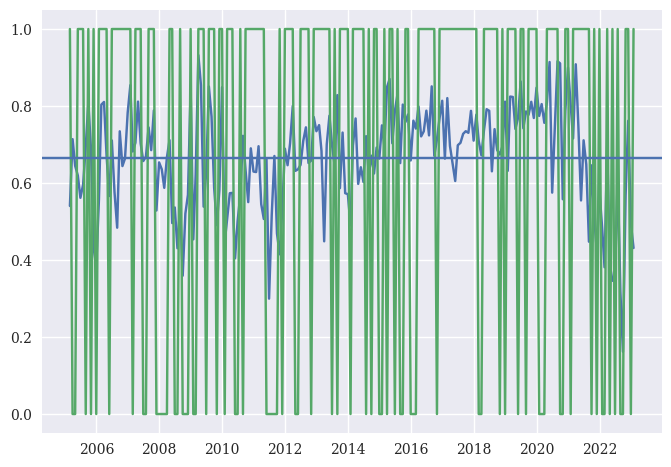

In [1785]:
plt.plot(full_probit_predictions.index,full_probit_predictions['Predicted_Probability'])
plt.plot(full_probit_predictions.index, full_probit_predictions.Direction)
plt.axhline(full_probit_predictions['Predicted_Probability'].mean())

In [1860]:
full_probit_predictions[full_probit_predictions.Direction == 0].median()

Predicted_Probability    0.652658
Direction                0.000000
Predicted_Direction      1.000000
dtype: float64

In [1861]:
full_probit_predictions[full_probit_predictions.Direction == 1].median()

Predicted_Probability    0.703115
Direction                1.000000
Predicted_Direction      1.000000
dtype: float64

In [1803]:
full_probit_predictions.loc[(full_probit_predictions.Predicted_Direction==0) & (full_probit_predictions.Direction == 0)]

,Predicted_Probability,Direction,Predicted_Direction
2005-12-31,0.384646,0,0
2008-07-31,0.430488,0,0
2008-09-30,0.359236,0,0
2009-01-31,0.453647,0,0
2009-10-31,0.490559,0,0
2010-01-31,0.446115,0,0
2010-05-31,0.404491,0,0
2010-06-30,0.501455,0,0
2011-06-30,0.299720,0,0
2011-09-30,0.468901,0,0


In [1862]:
len(full_probit_predictions.loc[(full_probit_predictions.Predicted_Direction==0) & (full_probit_predictions.Direction == 0)])/len(full_probit_predictions.Direction == 0)

0.08796296296296297

In [1836]:
full_probit_results.fittedvalues[-10:]

2022-04-30   -0.282824
2022-05-31   -0.396166
2022-06-30   -0.370446
2022-07-31    0.304065
2022-08-31   -0.473644
2022-09-30   -0.986962
2022-10-31    0.173391
2022-11-30    0.712074
2022-12-31   -0.012848
2023-01-31   -0.173212
dtype: float64

In [1868]:
def _probit_estimator2(df:pd.DataFrame):
    temp_model = smf.probit(formula='Direction ~ +Direction_lag1+ MKT_Rets_Lag1 +MKT_Rets_lag2 + MKT_Rets_Lag3+MKT_Rets_lag4+MKT_Rets_Lag6+MKT_Rets_Lag12+Three_M_TBill_Lag3 +\
    term_spread_lag3 + dsspread_lag6 +epratio_lag1+UMICH_Consumer_Sentiment_lag3+Oil_Rets_lag2+I(Oil_Rets_lag2**2)+Inflation_YOY_lag2+I(Inflation_YOY_lag2**2)', data = full_matrix).fit(disp = 0).params

    return temp_model
def expanding_full_probit(window:int, df:pd.DataFrame, x_matrix:pd.DataFrame):
    n_rows = df.shape[0]
    data = df.copy()
    x_mat = sm.add_constant(x_matrix.copy())
    
    start = window
    predictions = list()
    for i in range(start, n_rows):


        window_data = data.iloc[0:start]

        model = _probit_estimator2(window_data)
        coef = model.values
        
        next_month_data = x_mat.iloc[i:i+1]
        
        
        prediction = (next_month_data@ coef)
        
        predictions.append(stats.norm.cdf(prediction.values[0]))

    prediction_series = pd.Series(predictions,index = df.index[start:])


    return prediction_series
    



In [1865]:
full_matrix

,Direction,Direction_lag1,MKT_Rets_Lag1,MKT_Rets_lag2,MKT_Rets_Lag3,MKT_Rets_lag4,MKT_Rets_Lag6,MKT_Rets_Lag12,Three_M_TBill_Lag3,term_spread_lag3,dsspread_lag6,epratio_lag1,UMICH_Consumer_Sentiment_lag3,Oil_Rets_lag2,Inflation_YOY_lag2
2005-02-28,1,0.0,-0.022421,0.030154,0.044510,0.012885,0.002436,0.013571,0.0223,0.0213,0.0081,-0.339649,0.011996,-0.083983,0.032556
2005-03-31,0,1.0,0.020904,-0.022421,0.030154,0.044510,0.010019,-0.013195,0.0222,0.0202,0.0078,-0.351612,0.046336,0.124074,0.029698
2005-04-30,0,0.0,-0.018281,0.020904,-0.022421,0.030154,0.012885,-0.018921,0.0251,0.0163,0.0073,-0.326336,-0.016478,0.129670,0.030075
2005-05-31,1,0.0,-0.018735,-0.018281,0.020904,-0.022421,0.044510,0.017123,0.0276,0.0160,0.0069,-0.298339,-0.014660,0.085819,0.031483
2005-06-30,1,1.0,0.032225,-0.018735,-0.018281,0.020904,0.030154,0.018494,0.0279,0.0171,0.0067,-0.324971,-0.015940,-0.046387,0.035106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,0,0.0,-0.040802,0.092087,-0.082469,0.002257,0.037556,-0.046575,0.0172,0.0126,0.0087,-2.058551,-0.143836,-0.041176,0.085248
2022-10-31,1,0.0,-0.092417,-0.040802,0.092087,-0.082469,-0.087769,0.070164,0.0241,0.0026,0.0093,-1.912029,0.030000,-0.088416,0.082627
2022-11-30,1,1.0,0.081276,-0.092417,-0.040802,0.092087,0.002257,-0.008035,0.0296,0.0019,0.0103,-1.973747,0.130097,-0.086105,0.082017
2022-12-31,0,1.0,0.055592,0.081276,-0.092417,-0.040802,-0.082469,0.046288,0.0333,0.0050,0.0110,-2.005080,0.006873,0.008989,0.077454


In [2051]:
full_probit_expanding = pd.DataFrame(expanding_full_probit(40,full_matrix,DESIGN_MATRIX2), columns=['Predicted_Probability'])

In [2052]:
full_probit_expanding['Predicted_Direction'] = full_probit_expanding.Predicted_Probability.apply(probit_filter,threshold = .505)

In [2053]:
full_probit_expanding

,Predicted_Probability,Predicted_Direction
2008-06-30,0.536520,1
2008-07-31,0.430488,0
2008-08-31,0.542292,1
2008-09-30,0.359236,0
2008-10-31,0.520659,1
...,...,...
2022-09-30,0.161831,0
2022-10-31,0.568828,1
2022-11-30,0.761790,1
2022-12-31,0.494875,0


In [2065]:
full_data_portfolio = probit_trade_strategy(100000,full_probit_expanding,trade_df_full,repo, long_positions_only=False)

In [2066]:
full_data_portfolio

,Capital,Entry_Date,Exit_Date,No_Shares,Rebate_Rate,NET_Interest,Entry_Value,Exit_Value,PNL,Cumulative_PNL,ROC
2008-06-02,1.000000e+05,2008-06-02,2008-06-30,962.0,0.0094,0.000000,9.995778e+04,9.256760e+04,-7390.179819,-7.390180e+03,-0.073933
2008-07-01,9.260982e+04,2008-07-01,2008-07-31,-959.0,0.0092,70.968301,-9.256735e+04,-9.144973e+04,1188.585246,-6.201595e+03,-0.012074
2008-08-01,9.379841e+04,2008-08-01,2008-08-29,988.0,0.0052,0.000000,9.371745e+04,9.567113e+04,1953.676752,-4.247918e+03,0.020846
2008-09-02,9.575208e+04,2008-09-02,2008-09-30,-995.0,0.0064,47.662460,-9.575048e+04,-8.725625e+04,8541.888180,4.293970e+03,-0.088712
2008-10-01,1.042940e+05,2008-10-01,2008-10-31,1188.0,-0.0034,0.000000,1.042442e+05,8.697197e+04,-17272.235958,-1.297827e+04,-0.165690
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,9.638036e+05,2022-09-01,2022-09-30,-2452.0,0.0153,1187.559832,-9.635374e+05,-8.717544e+05,92970.504852,9.567741e+05,-0.095256
2022-10-03,1.056774e+06,2022-10-03,2022-10-31,2895.0,0.0187,0.000000,1.056427e+06,1.112906e+06,56479.547748,1.013254e+06,0.053463
2022-11-01,1.113254e+06,2022-11-01,2022-11-30,2908.0,0.0272,0.000000,1.113012e+06,1.180050e+06,67037.765246,1.080291e+06,0.060231
2022-12-01,1.180291e+06,2022-12-01,2022-12-30,-2910.0,0.0304,2889.670635,-1.179993e+06,-1.112871e+06,70010.916729,1.150302e+06,-0.056883


In [1910]:
direction_df.tail()

,Direction
date,
2022-10-31,1
2022-11-30,1
2022-12-31,0
2023-01-31,1
2023-02-28,1


In [2067]:
port_rets = full_data_portfolio[['Exit_Date','ROC']].set_index('Exit_Date')

In [2068]:
port_rets

,ROC
Exit_Date,
2008-06-30,-0.073933
2008-07-31,-0.012074
2008-08-29,0.020846
2008-09-30,-0.088712
2008-10-31,-0.165690
...,...
2022-09-30,-0.095256
2022-10-31,0.053463
2022-11-30,0.060231


In [2069]:
port_rets['Market_Rets'] = market.loc[port_rets.index].pct_change()

In [2070]:
port_rets.dropna(inplace = True)

In [2071]:
port_rets.corr()

,ROC,Market_Rets
ROC,1.000000,0.953403
Market_Rets,0.953403,1.000000


In [2061]:
port_rets.std()

ROC            0.049566
Market_Rets    0.046865
dtype: float64

In [2062]:
port_rets.std()

ROC            0.049566
Market_Rets    0.046865
dtype: float64

In [2063]:
port_rets.mean()

ROC            0.008326
Market_Rets    0.009374
dtype: float64

In [2064]:
smf.ols(formula='ROC~Market_Rets',data = port_rets).fit(disp = 0).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ROC   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1728.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           5.88e-92
Time:                        23:39:13   Log-Likelihood:                 487.67
No. Observations:                 175   AIC:                            -971.3
Df Residuals:                     173   BIC:                            -965.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0011      0.001     -0.974      0.331      -0.003       0.001
Market_Rets     1.0084      0.024     41.565      0.000       0.960       1.056
==============================================================================
Omnibus:                      111.567   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1084.143
Skew:                           2.197   Prob(JB):                    3.81e-236
Kurtosis:                      14.374   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Exit_Date'>

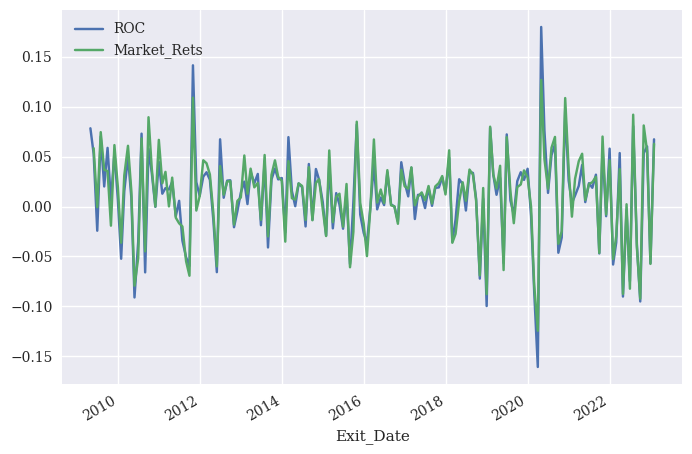

In [2050]:
port_rets.plot()

In [1972]:
market.loc[port_rets.index]

,adj_close
Exit_Date,
2009-04-30,67.120418
2009-05-29,71.043838
2009-06-30,70.995845
2009-07-31,76.292545
2009-08-31,79.110761
...,...
2022-09-30,355.527913
2022-10-31,384.423639
2022-11-30,405.794333


In [1964]:
port_rets

,ROC
Exit_Date,
2009-04-30,0.07846
2009-05-29,0.052793
2009-06-30,-0.024296
2009-07-31,0.070183
2009-08-31,0.020111
...,...
2022-09-30,-0.095256
2022-10-31,0.053463
2022-11-30,0.060231


# Expanding Regression